# Machine learning - les 2

Notebook bij les 2 van de leerlijn machine learning van S3 - AI. 

In de vorige les heb je je eerste machine learning model getraind, namelijk de decision tree. Dit deden we op de pinguin dataset, een simpele dataset waarop we erg goede voorspellingen konden doen.

In deze les gaan we nieuwe modellen introduceren, namelijk een Random Forest en k-nearest neighbors. Deze modellen gaan we gebruiken om fruit te classificeren en om te voorspellen of iemand aan een hartziekte leidt of niet. Ook zul je methodes gaan zien om je modellen te verbeteren, namelijk het *tunen van hyperparameters* en het *schalen van je features*.

**Voorbereiding voor deze les:**
- Lees t/m **Decision trees and over-fitting** uit dit hoofdstuk uit het data science handbook van Jake VanderPlas: https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html 
- Maak opdracht 2.1 uit dit notebook
- Bekijk dit filmpje over random forests: https://www.youtube.com/watch?v=v6VJ2RO66Ag&t=13s, het is even wennen aan het accent, maar de uitleg is erg goed. Inhoudelijk gaan we hier in het college ook nog op in. 




In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import helpers_05_08  # bron: Jake van der Plas


## Random Forest Classifier

### White box vs black box model

In de vorige les heb je je eerste machine learning model getraind. Het mooie aan een beslisboom is dat je heel goed inzichtelijk kunt maken hoe het model tot een beslissing is gekomen, je kunt namelijk voor iedere rij in de dataset het pad door de beslisboom volgen. Modellen waarbij je makkelijk inzichtelijk kunt maken hoe een beslissing tot stand is gekomen, noemen we een *white box model*. Dit in tegen stelling tot een *black box model*, waarbij je deze beslissing niet in kunt zien. 

Voor sommige use cases is dit verschil erg belangrijk, denk bijvoorbeeld aan een geval waarbij een machine learning model gebruikt wordt om te bepalen of iemand een mogelijke fraudeur is of niet. Dan wil je wel kunnen achterhalen op basis waarvan een beslissing gemaakt is om die keuze toe te kunnen lichten of om te controleren of het model wel ethisch handelt. Helaas is het zo dat complexere modellen vaak beter presteren, maar minder goed uitlegbaar zijn. Als data scientist zul je hier in de modelkeuze, in overleg met je opdrachtgever, rekening mee moeten houden.

### Overfitten

Een voordeel van de decision tree is dus dat deze goed *uitlegbaar* is. Een groot nadeel aan dit model is dat deze makkelijk kan *overfitten*. Dit is de naam voor het fenomeen waarbij een model heel goed de patronen in de train set leert, maar niet goed voorspelt op nieuwe, ongeziene data. Oftwel het model *generaliseert* niet goed. Dat concept van *overfitten* wordt in deze bron goed uitgelegd: https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html 

Lees deze uitleg tot en met het hoofdstuk **Decision trees and over-fitting**.

### ML Opdracht 2.1

In [2]:
fruit_df = pd.read_table('../databronnen/knn_fruit.txt')
fruit_df.sample()

fruit_label fruit_name fruit_subtype  mass  width  height  color_score
51            4      lemon       unknown   116    6.0     7.5         0.72

1. Lees de dataset `knn_fruit.txt` in en bekijk deze. Train een decision tree classifier op deze dataset, waarbij je de `mass` en de `width` kolom gebruikt als features en de `fruit_label` kolom als target. Je gaat dus kijken hoe goed je de fruitsoort kunt voorspellen op basis van de breedte en het gewicht van een stuk fruit. Split je data in een train en een test set zodat je de accuracy score op de test set kunt berekenen.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(fruit_df[['mass', 'width']], fruit_df['fruit_label'])

dtc = DecisionTreeClassifier().fit(X_train, y_train)

print(f"Accuracy of {dtc} on train set:", dtc.score(X_train, y_train))
print(f"Accuracy of {dtc} on test set:", dtc.score(X_test, y_test))

Accuracy of DecisionTreeClassifier() on train set: 1.0
Accuracy of DecisionTreeClassifier() on test set: 0.5333333333333333


2. Als je je model getraind hebt, gebruik dan onderstaande code om de beslissingen van je model te visualiseren. 

3. Gebruik de `plot_tree()`-functie van `sklearn` om de hele boom te visualiseren (zie het notebook van de vorige les). 

4. Leg aan de hand van deze visualisaties en de train- en test accuracy uit dat of de beslisboom *overfit* is of niet.

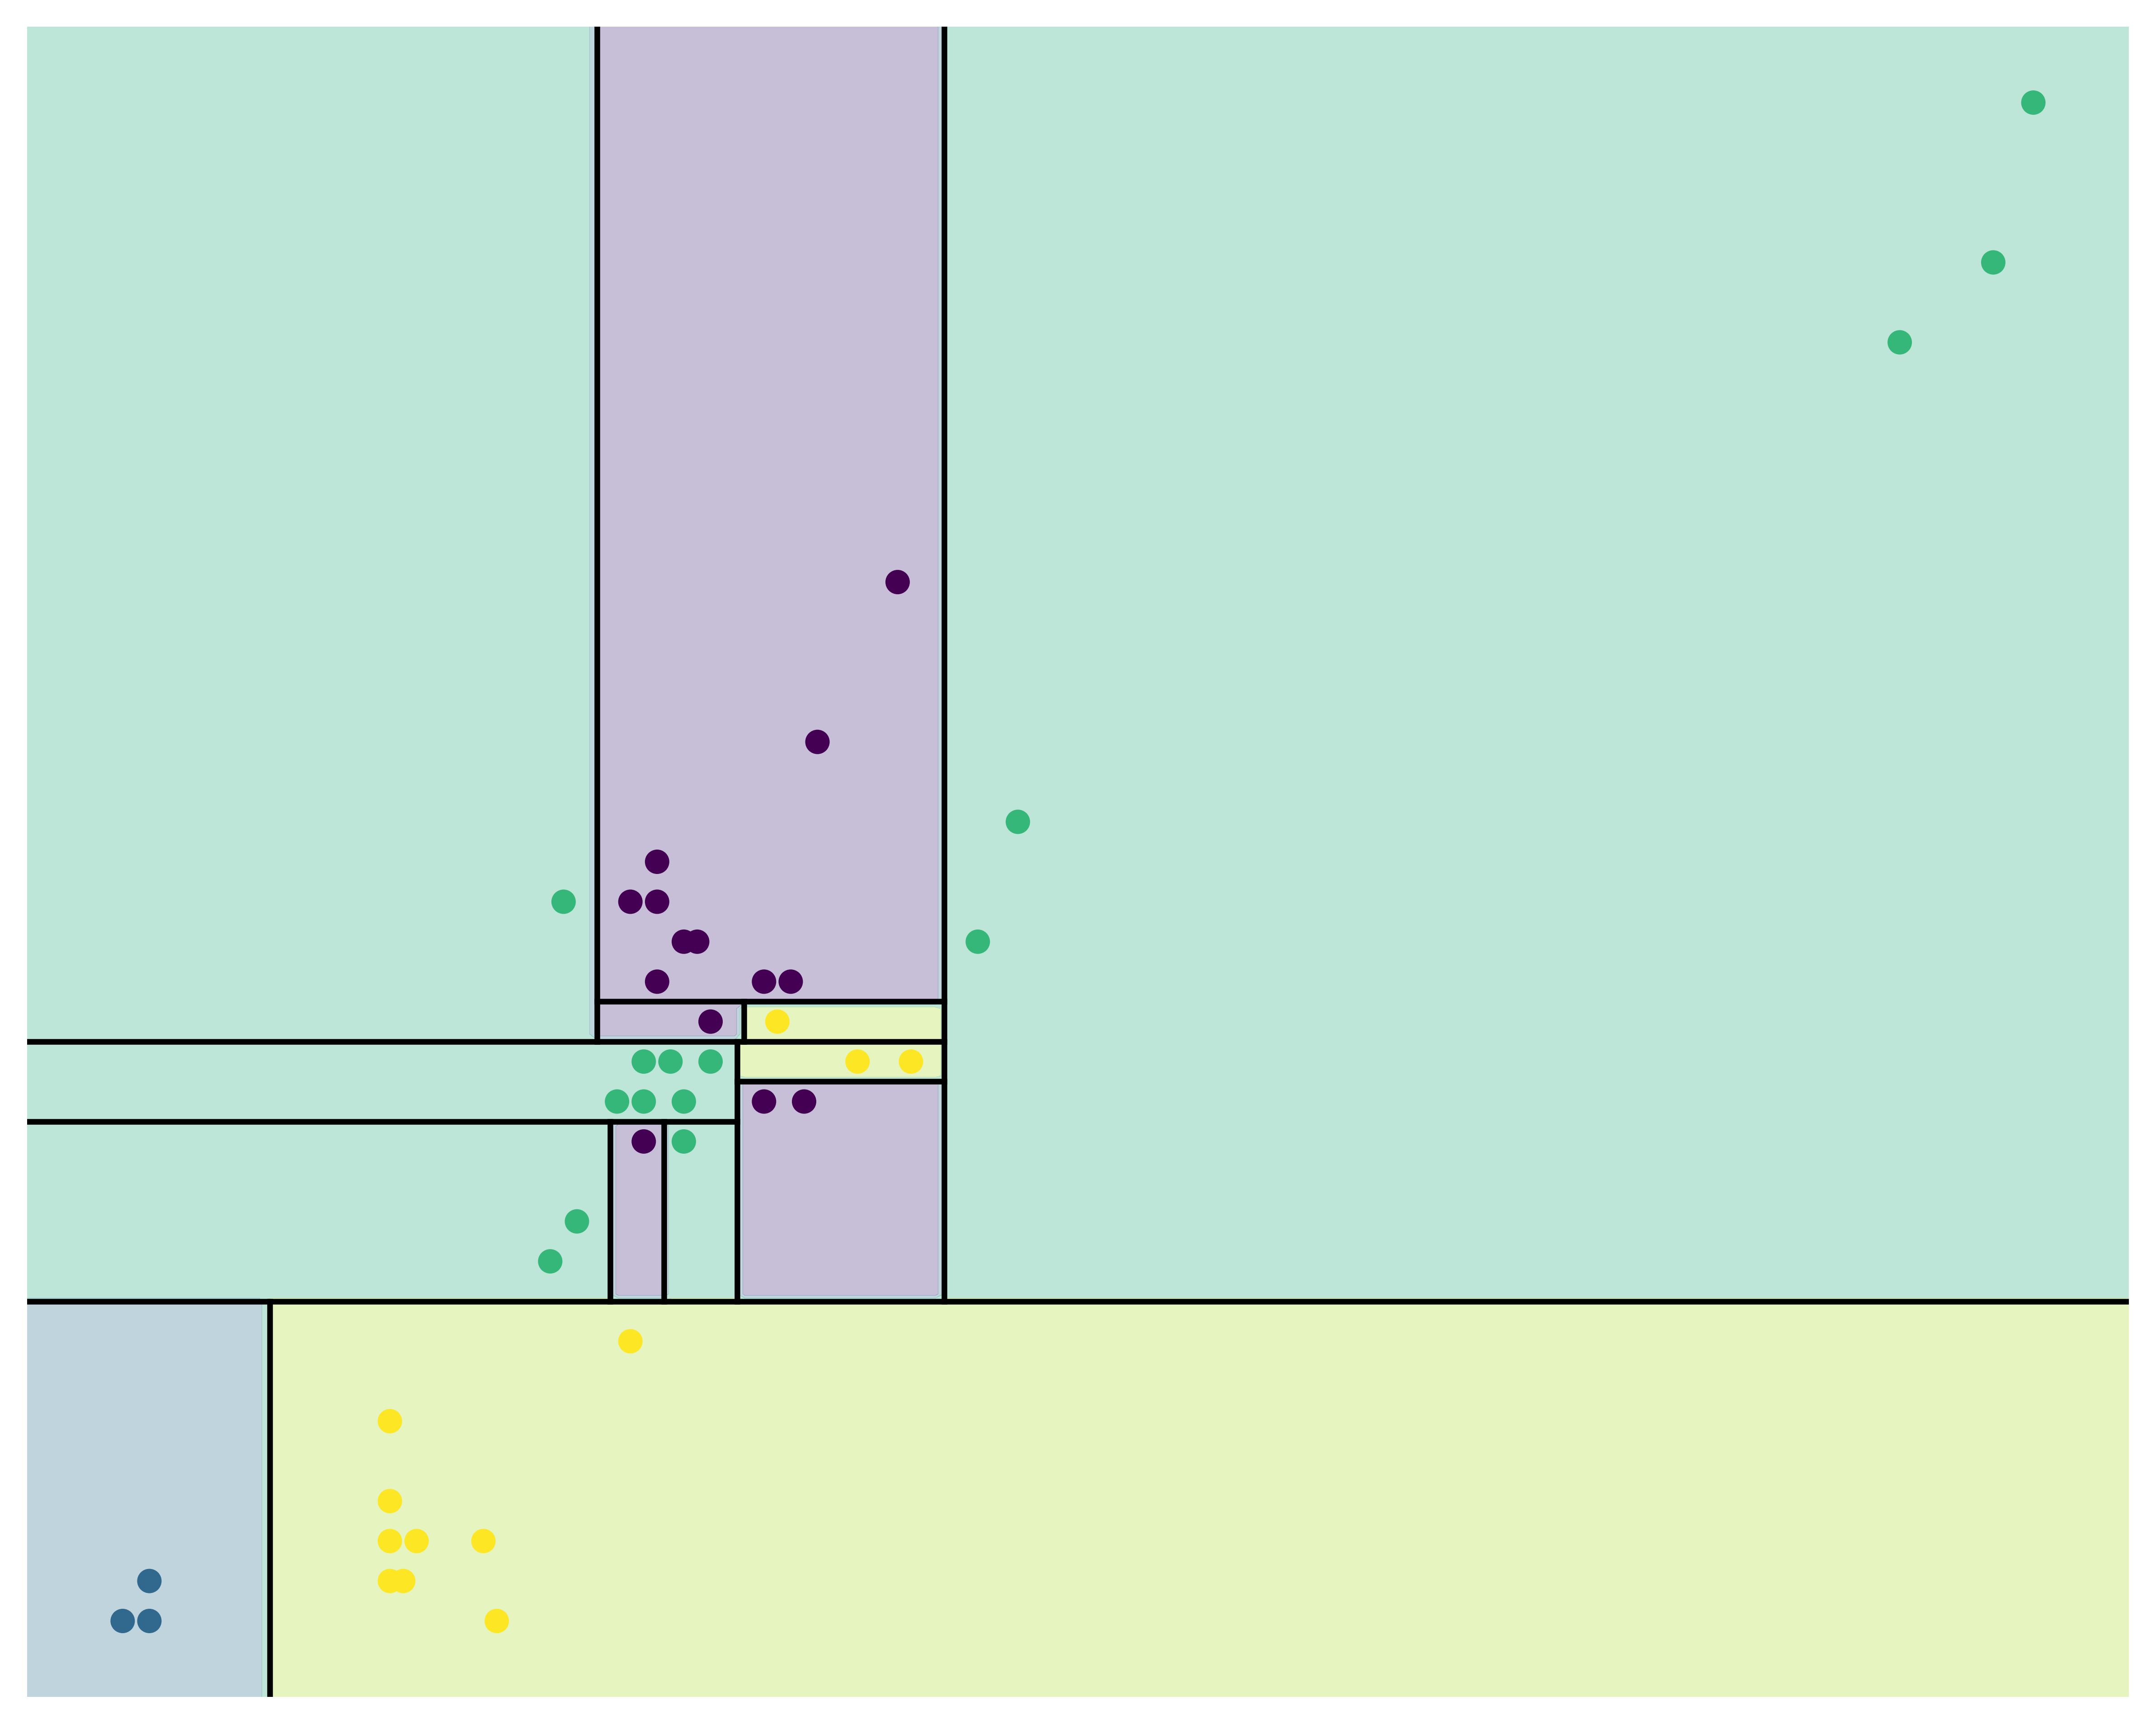

In [4]:
# code om beslissing van de boom te visualiseren - deze moet komen onder de code waarin je de beslisboom traint
# pas eventueel de variabele namen aan naar de door jou gekozen namen

le = LabelEncoder() 
y_train_label = le.fit_transform(y_train)
fig, ax = plt.subplots(1,1, figsize=(10, 8))
helpers_05_08.visualize_tree(dtc, np.array(X_train), y_train_label, ax = ax)

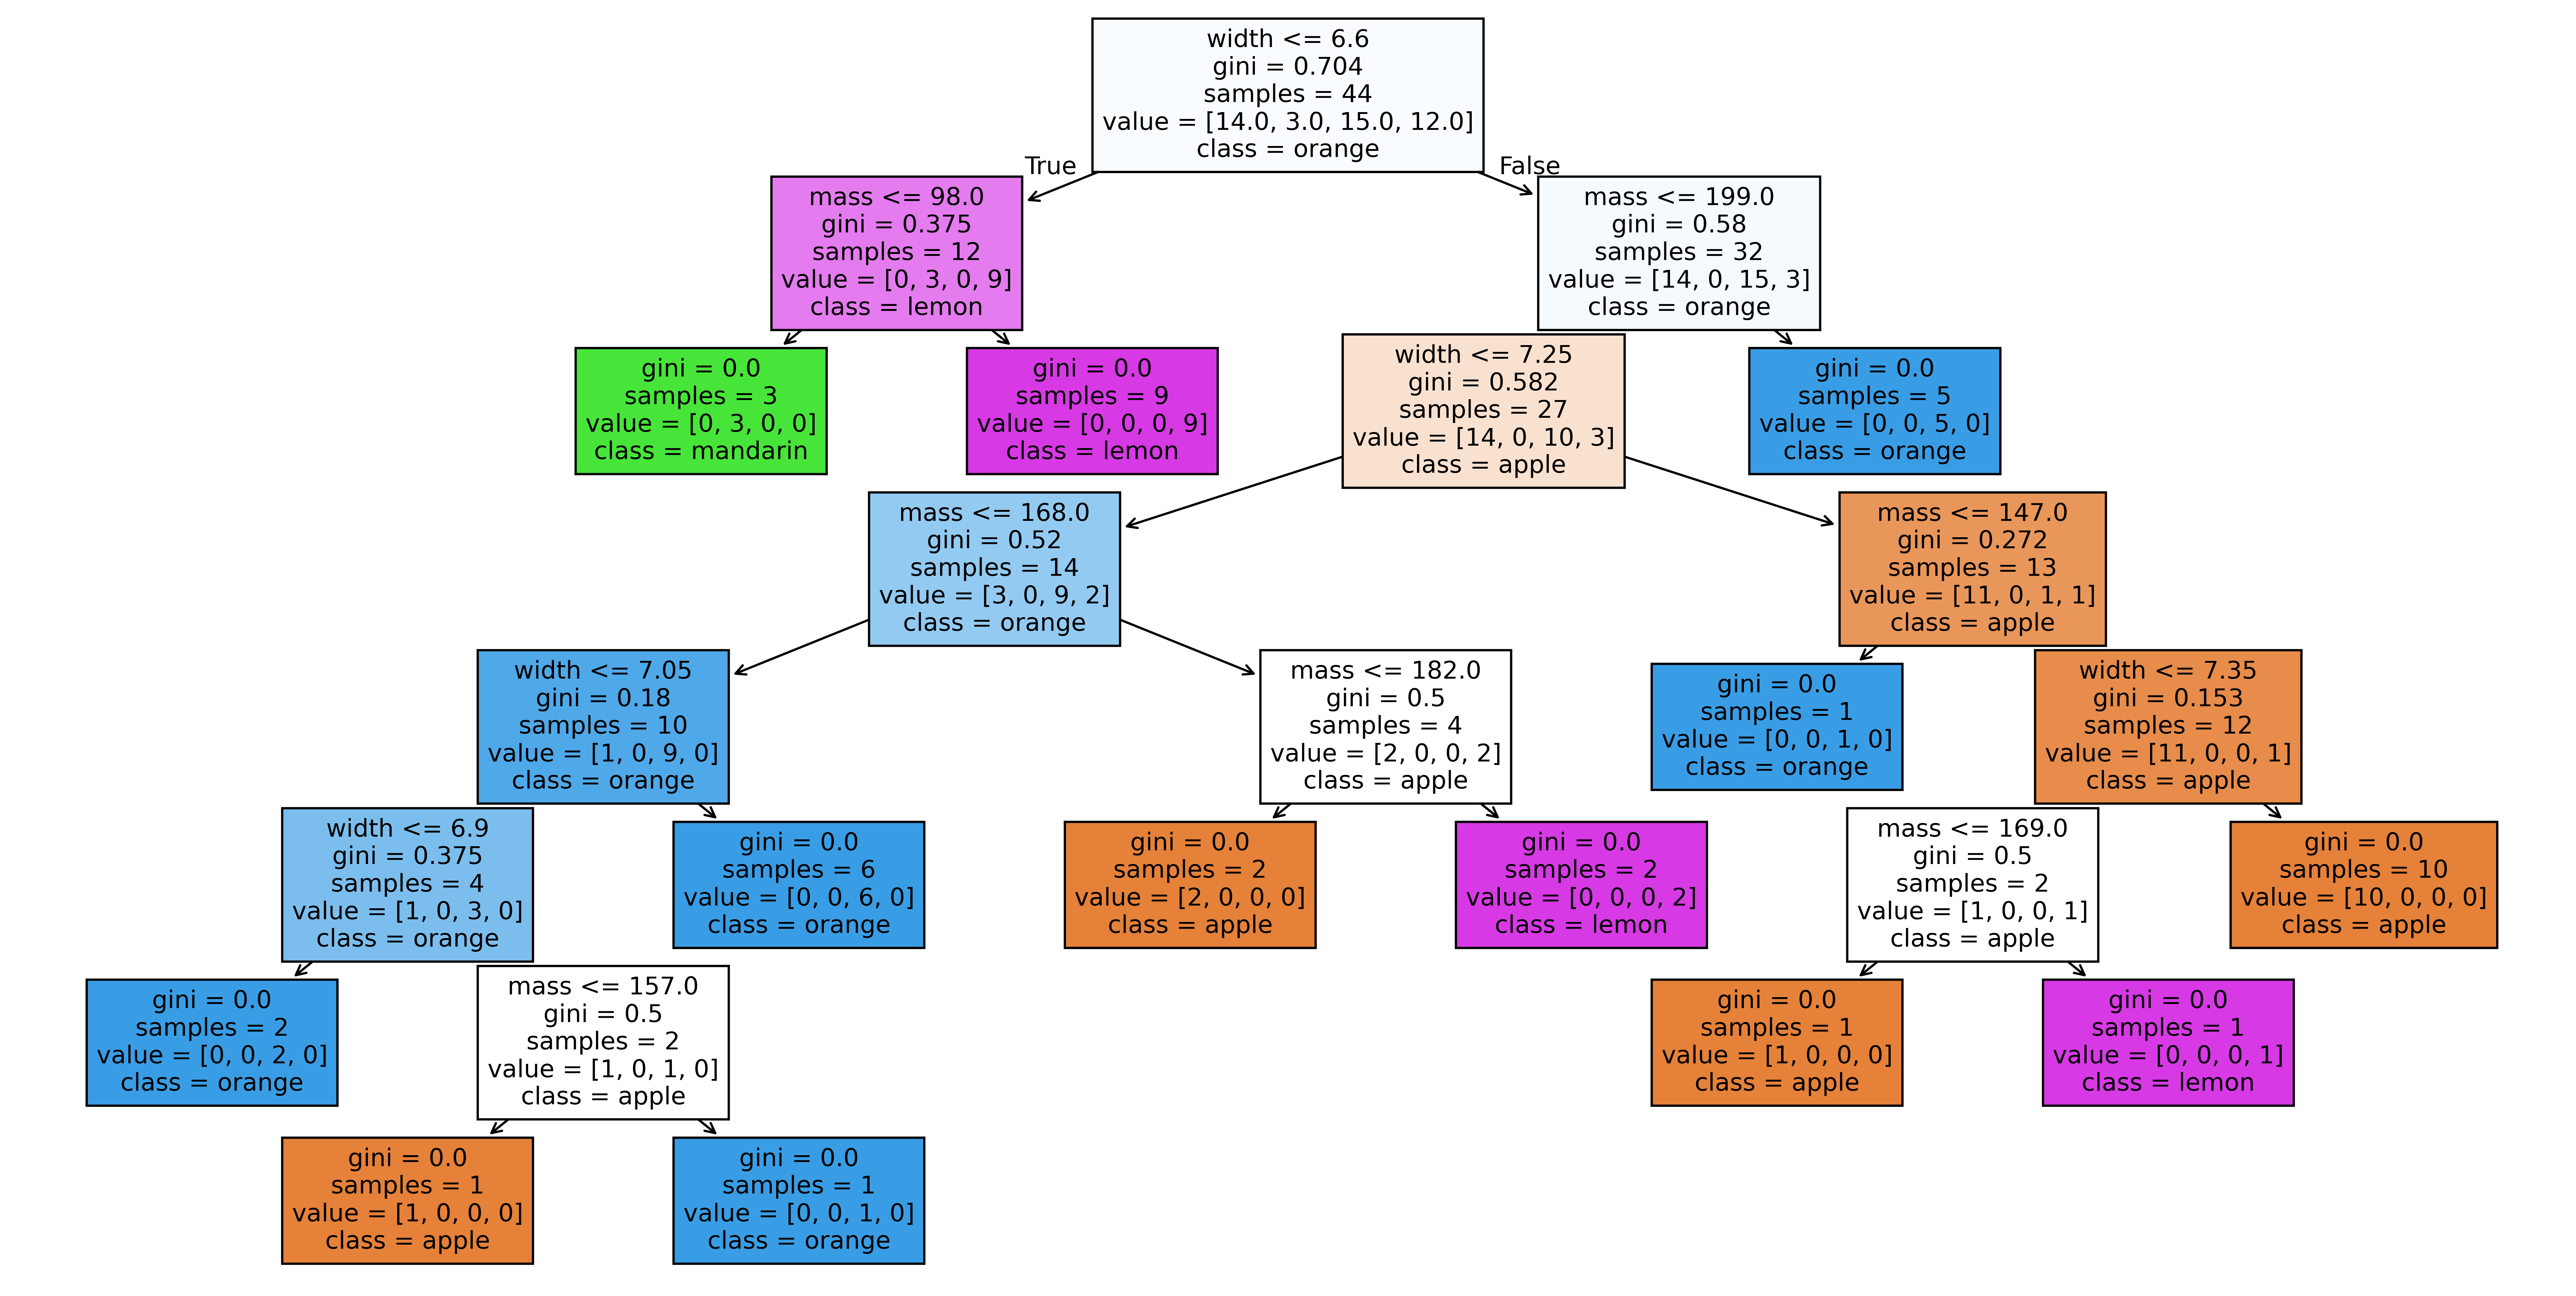

In [5]:
classes = fruit_df.sort_values('fruit_label')['fruit_name'].unique()

plt.figure(figsize=(20, 10))
plot_tree(dtc, feature_names=X_train.columns, class_names=classes, filled=True)
plt.show()

## Over- en underfitting

Een andere afbeelding die het overfitten duidelijk visualiseert is de volgende:

![over underfitting](../afbeeldingen/MachineLearning/overfitting.png "Overfitting en underfitting")


Bij *under-fitting* is het model te simpel, hij kan de variatie in de data niet vastleggen, dan is zowel de train als de test score laag. Bij *over fitting* is het model te complex, hij leert ook de *ruis* in de data, waardoor hij wel goed voorspelt op de trainingsdata, maar niet goed op ongeziene data. Dan heb je dus een hoge train score, maar een veel lagere test score.

Bij *under-fitting* wordt er ook wel gesproken over *high bias* en bij *over-fitting* over *high variance*. Deze termen kun je in literatuur hierover tegenkomen.

Een manier om het overfitten van een Decision Tree op te lossen, is door de diepte van de boom te beperken met de hyperparameter `max_depth`. (zie: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) Als je bijvoorbeeld kiest voor max_depth = 3, dan zal de boom de data maximaal 3 keer splitten waardoor hij niet meer in staat is om alle ruis in de data te leren.
Een andere parameter die je kunt gebruiken om overfitting tegen te gaan is `min_samples_leaf`. Deze geeft aan hoeveel datapunten er minimaal in een leaf node moeten zitten. Ook hiermee kun je ervoor zorgen dat de decision tree eerder stopt met splitten en niet ieder los punt apart classificeert.



### ML Opdracht 2.2
Train de `DecisionTreeClassifier` opnieuw op de 2D Fruit dataset (`mass`, `width`), maar stel nu `max_depth` in op 3.

Maak opnieuw de visualisaties uit de vorige opdracht en bereken de accuracy op de train- en testset. Is er sprake van overfitting, underfitting of vind je de je dat de boom goed is getuned? Leg je antwoord uit aan de hand van de visualisaties en de accuracies.

In [6]:
dtc = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

print(f"Accuracy of {dtc} on train set:", dtc.score(X_train, y_train))
print(f"Accuracy of {dtc} on test set:", dtc.score(X_test, y_test))

Accuracy of DecisionTreeClassifier(max_depth=3) on train set: 0.8409090909090909
Accuracy of DecisionTreeClassifier(max_depth=3) on test set: 0.5333333333333333


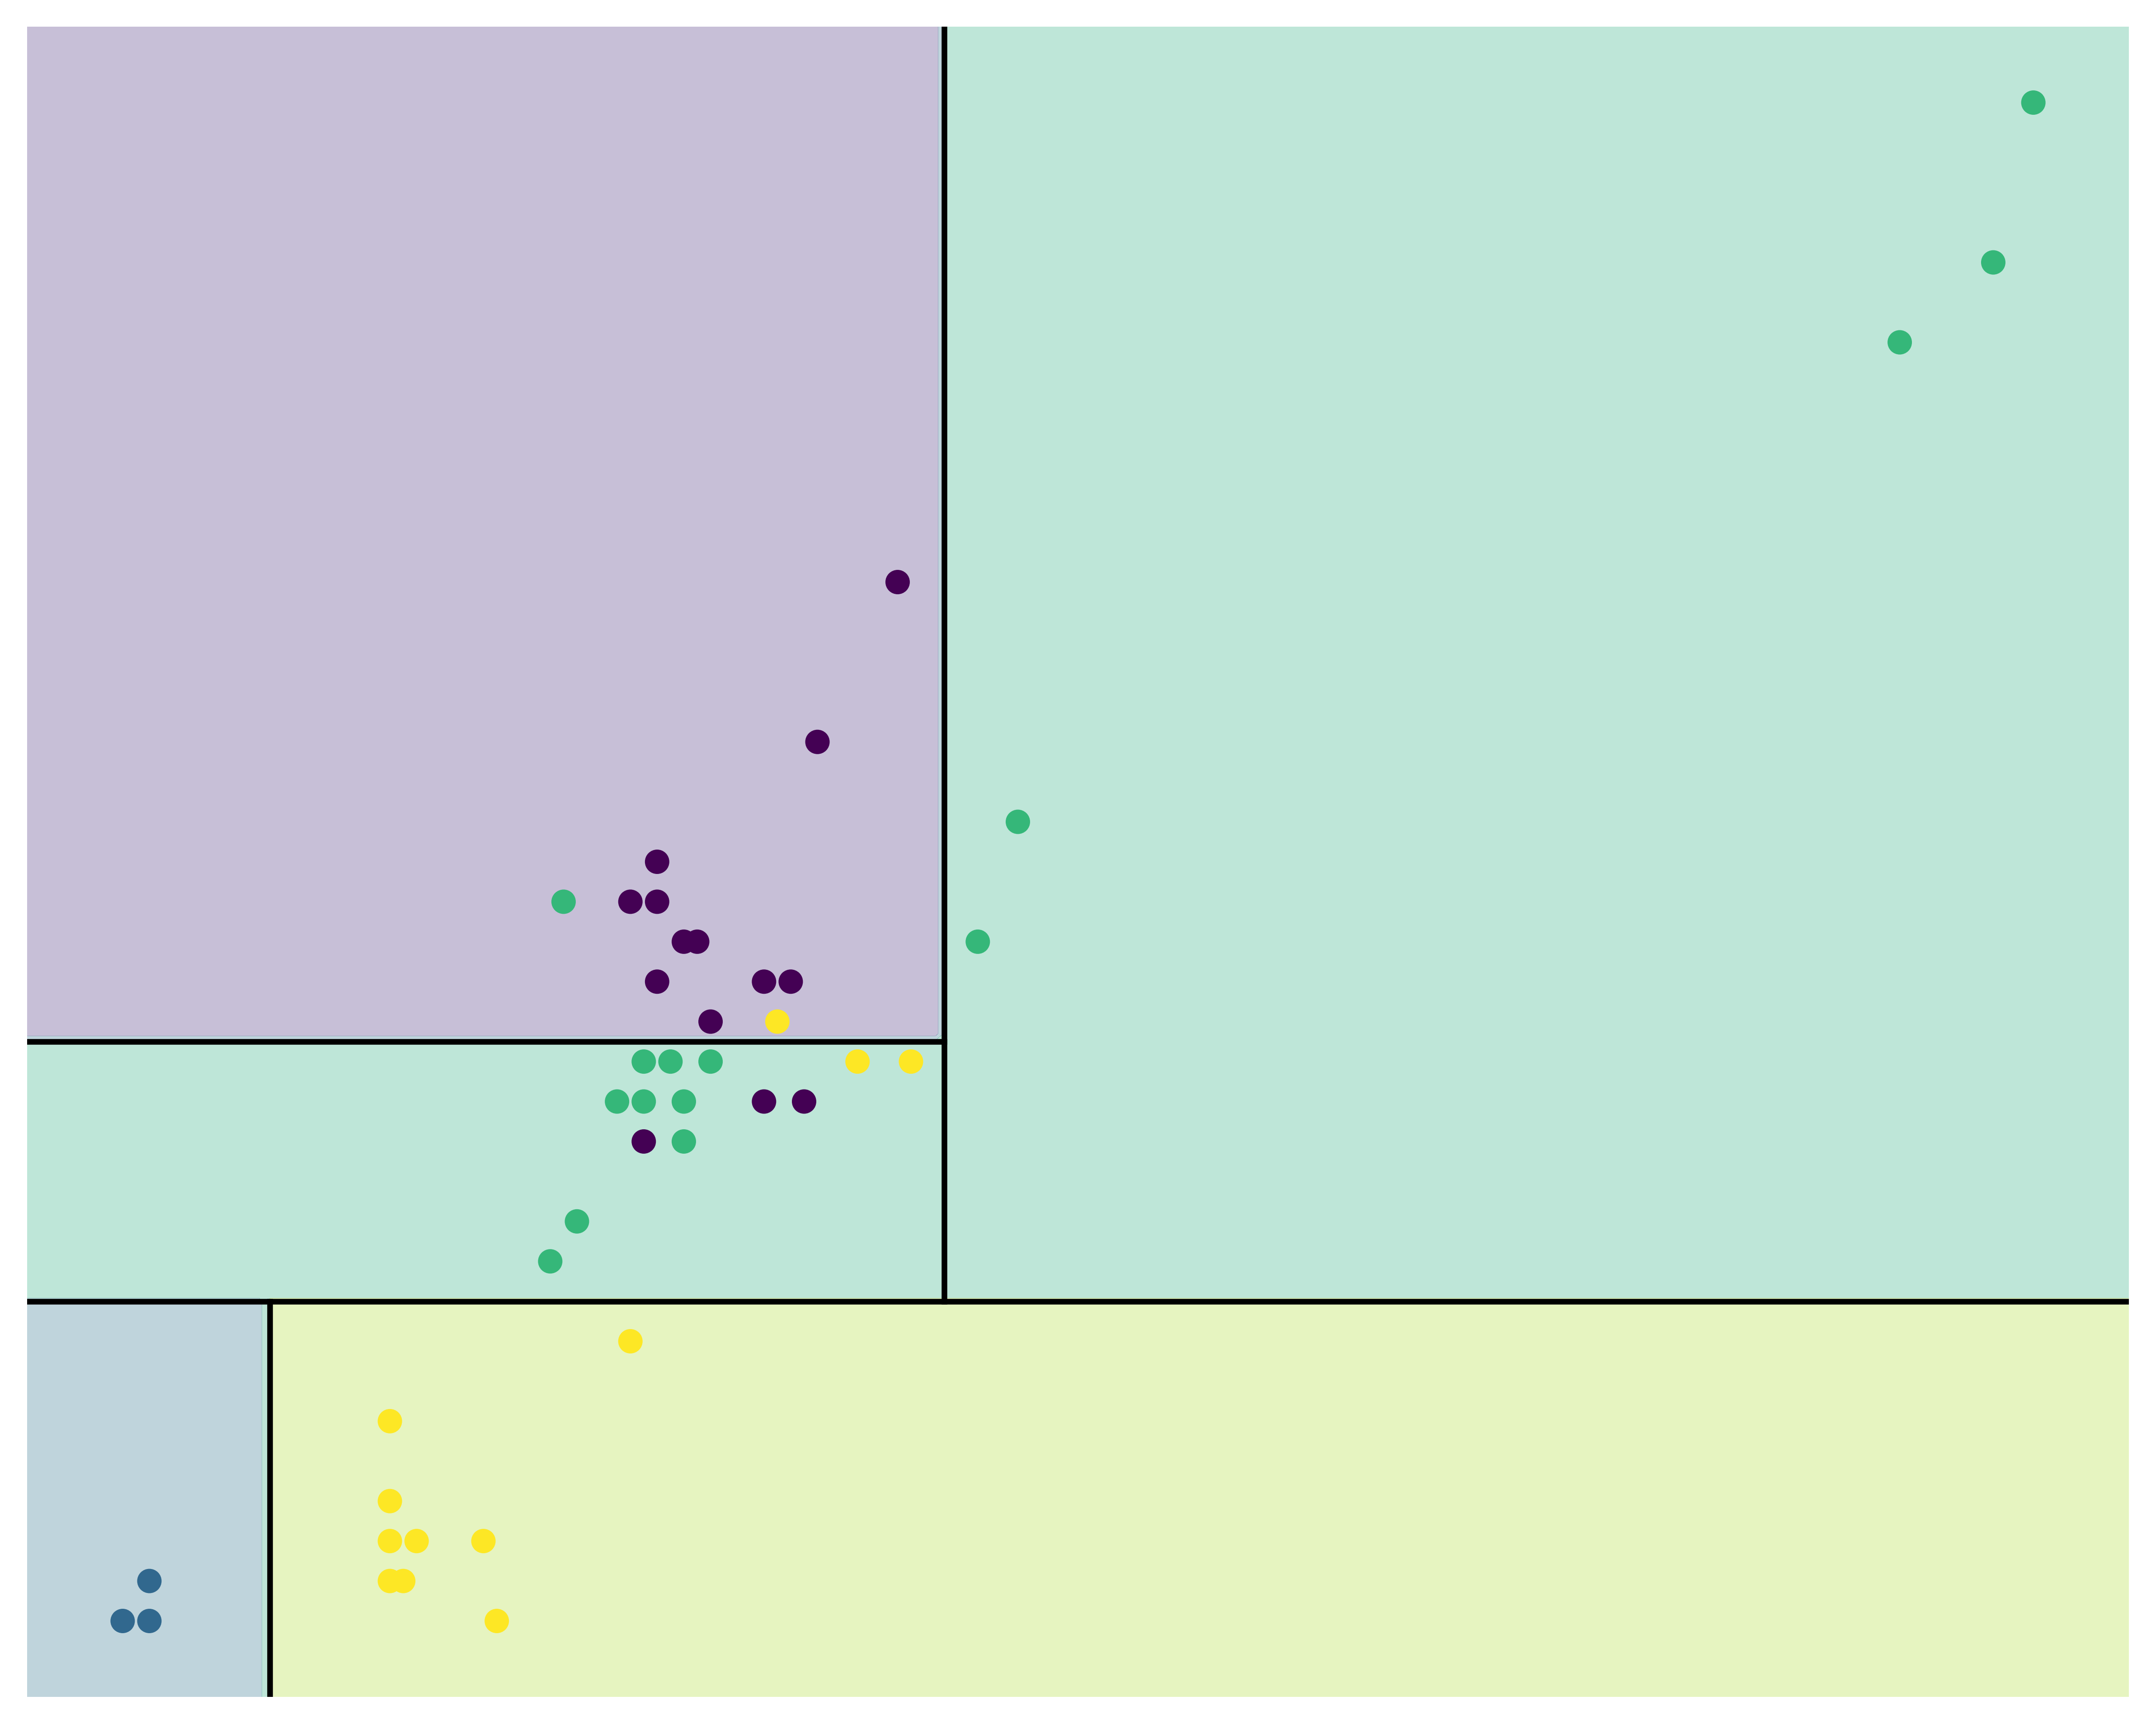

In [7]:
# code om beslissing van de boom te visualiseren - deze moet komen onder de code waarin je de beslisboom traint
# pas eventueel de variabele namen aan naar de door jou gekozen namen

le = LabelEncoder() 
y_train_label = le.fit_transform(y_train)
fig, ax = plt.subplots(1,1, figsize=(10, 8))
helpers_05_08.visualize_tree(dtc, np.array(X_train), y_train_label, ax = ax)

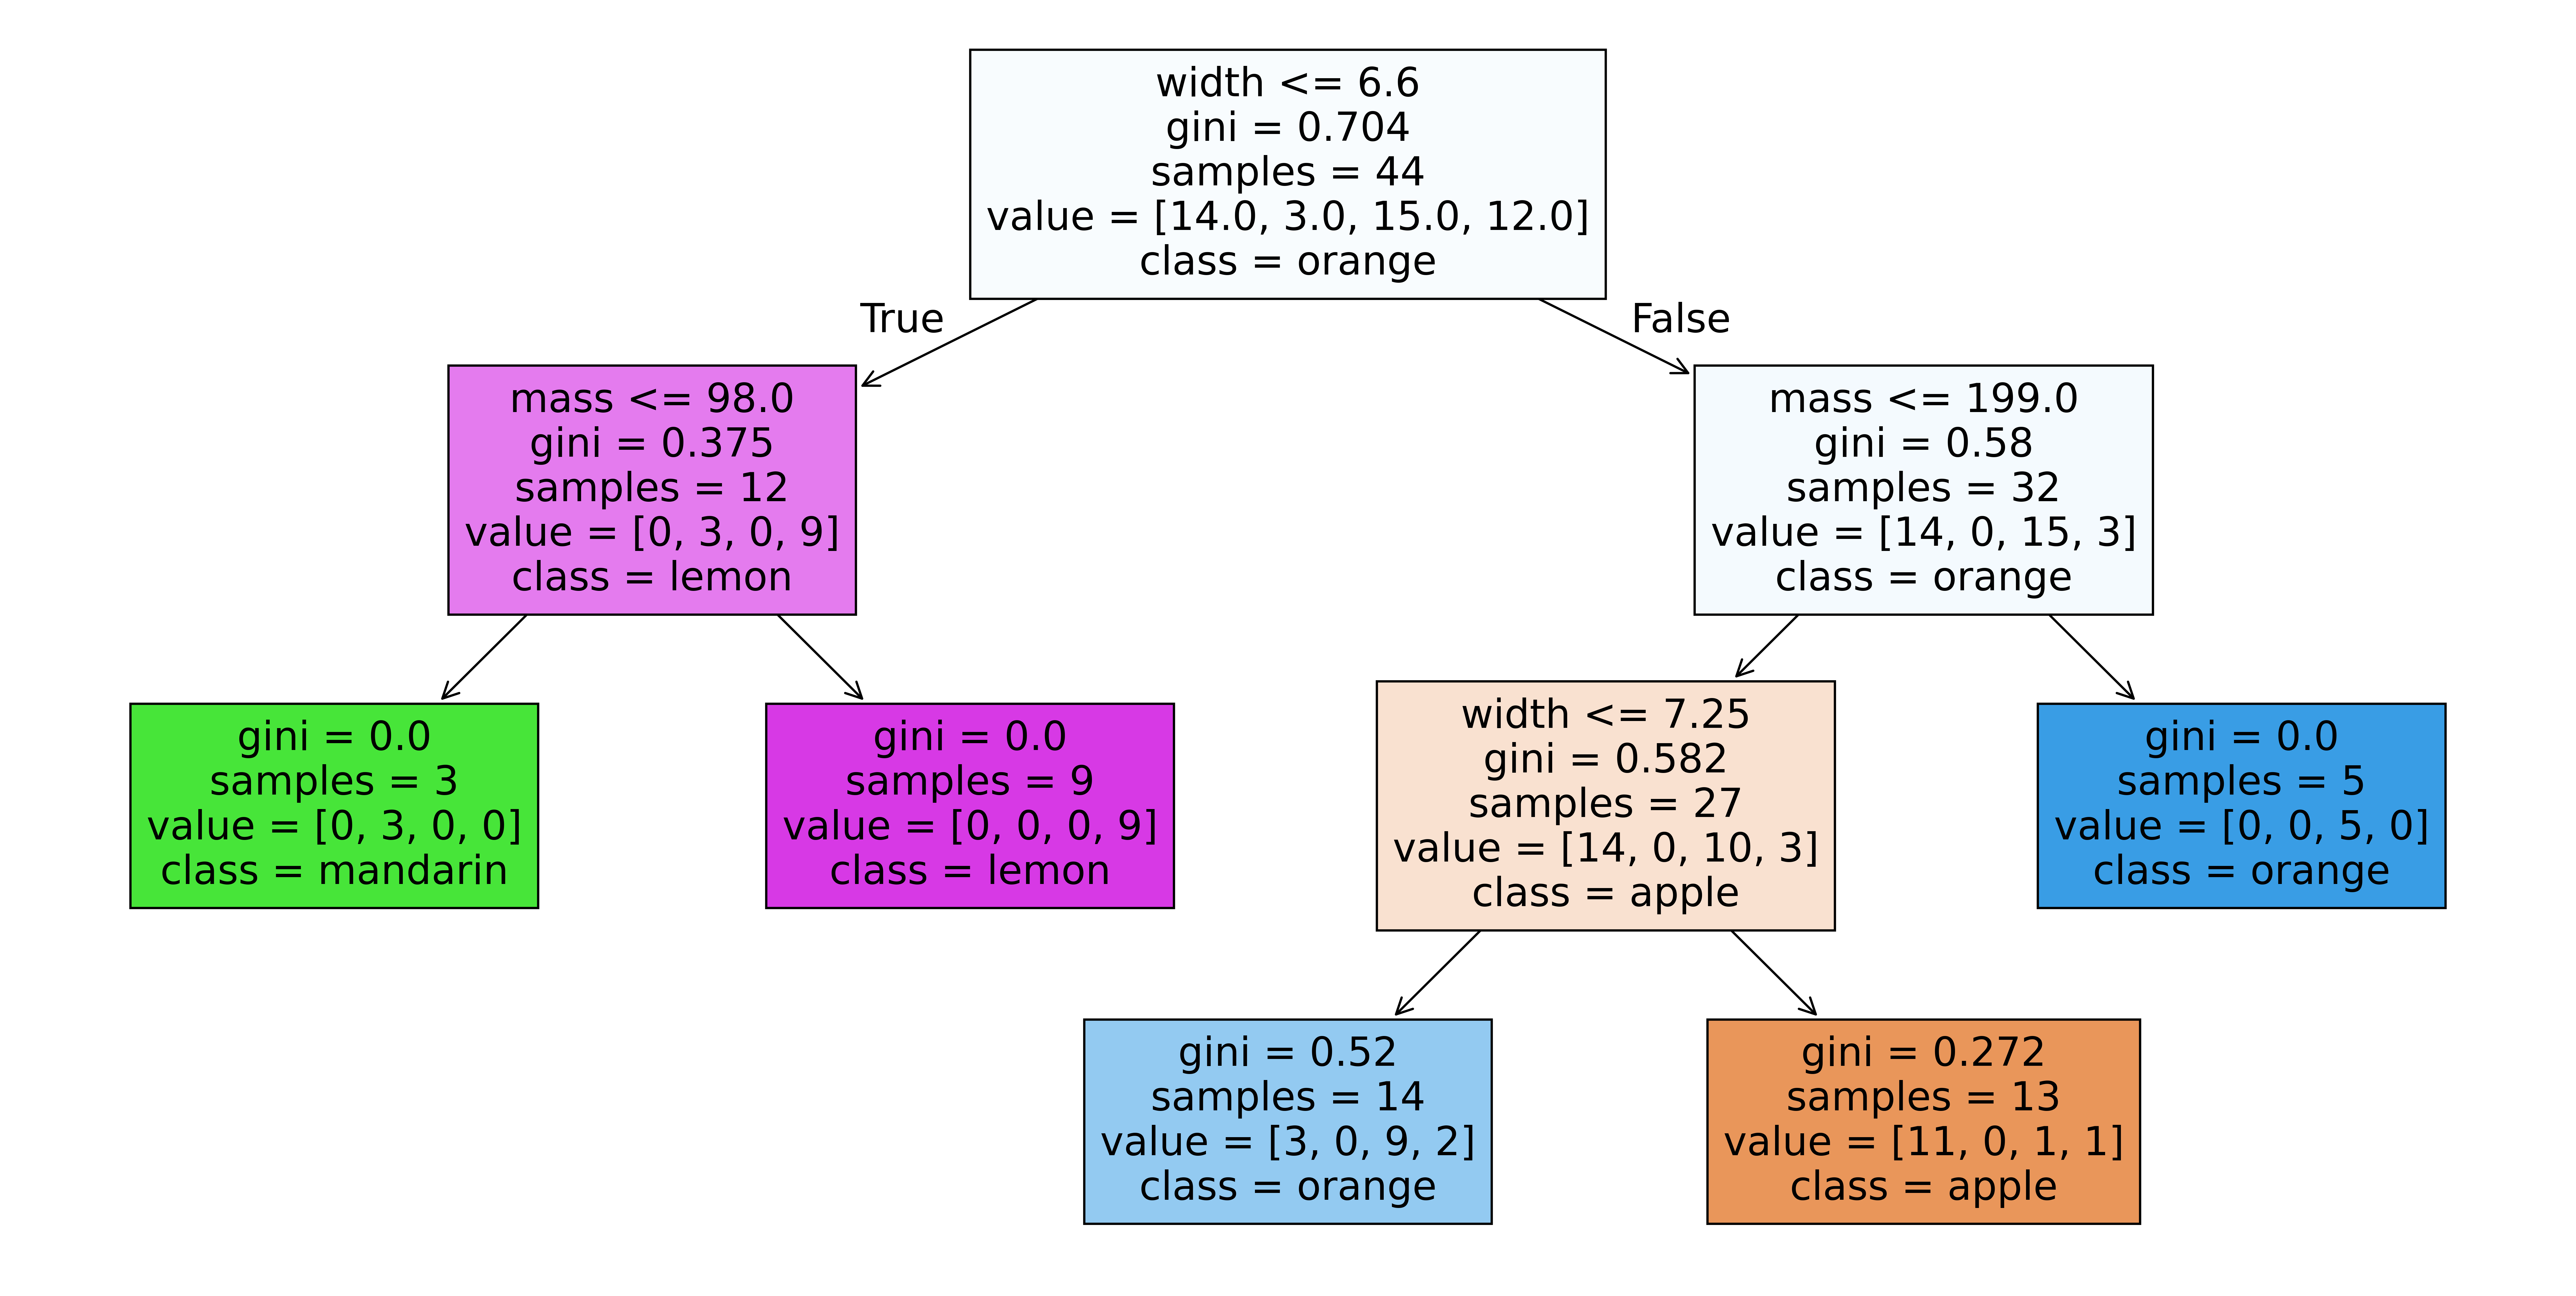

In [8]:
classes = fruit_df.sort_values('fruit_label')['fruit_name'].unique()

plt.figure(figsize=(20, 10))
plot_tree(dtc, feature_names=X_train.columns, class_names=classes, filled=True)
plt.show()

### Random Forest
Helaas is het zo, dat een ondiepe boom vaak underfit is. Deze ene ondiepe boom is niet in staat om de complexiteit van de relaties in de data te vangen. Wat wel goed werkt, is het trainen van een heleboel ondiepe bomen, die allemaal net iets anders zijn. Bijvoorbeeld door ze steeds op een willekeurige subset van data en features te trainen. Iedere boom doet vervolgens een voorspelling, en de voorspelling die het vaakst voorkomt is dan je uiteindelijke voorspelling. Die combinatie van bomen heet een *Random Forest*. 

Dit wordt goed uitgelegd onder het kopje **Ensembles of Estimators: Random Forests** uit het Data Science Handbook: https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html. Lees dat hoofdstuk door. We zullen dit ook in de les behandelen.

### ML Opdracht 2.3
Hierboven hebben we modellen getraind op 2 variabelen omdat we dat goed konden visualiseren. Nu gaan we ook de andere numerieke features uit de fruit dataset gebruiken om de fruitsoort te voorspellen. De features worden dan `mass`, `width`, `height`, en `color_score` en de target is nog steeds de `fruit_label`.

1. Train een descion tree met een max_depth van 3 op deze data. 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(fruit_df[['mass', 'width', 'height', 'color_score']], fruit_df['fruit_label'])
X_train.sample(3)

mass  width  height  color_score
13   164    7.3     7.7         0.70
56   116    5.9     8.1         0.73
38   158    7.2     7.8         0.77

In [10]:
dtc = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

print(f"Accuracy of {dtc} on train set:", dtc.score(X_train, y_train))
print(f"Accuracy of {dtc} on test set:", dtc.score(X_test, y_test))

Accuracy of DecisionTreeClassifier(max_depth=3) on train set: 0.9090909090909091
Accuracy of DecisionTreeClassifier(max_depth=3) on test set: 0.8


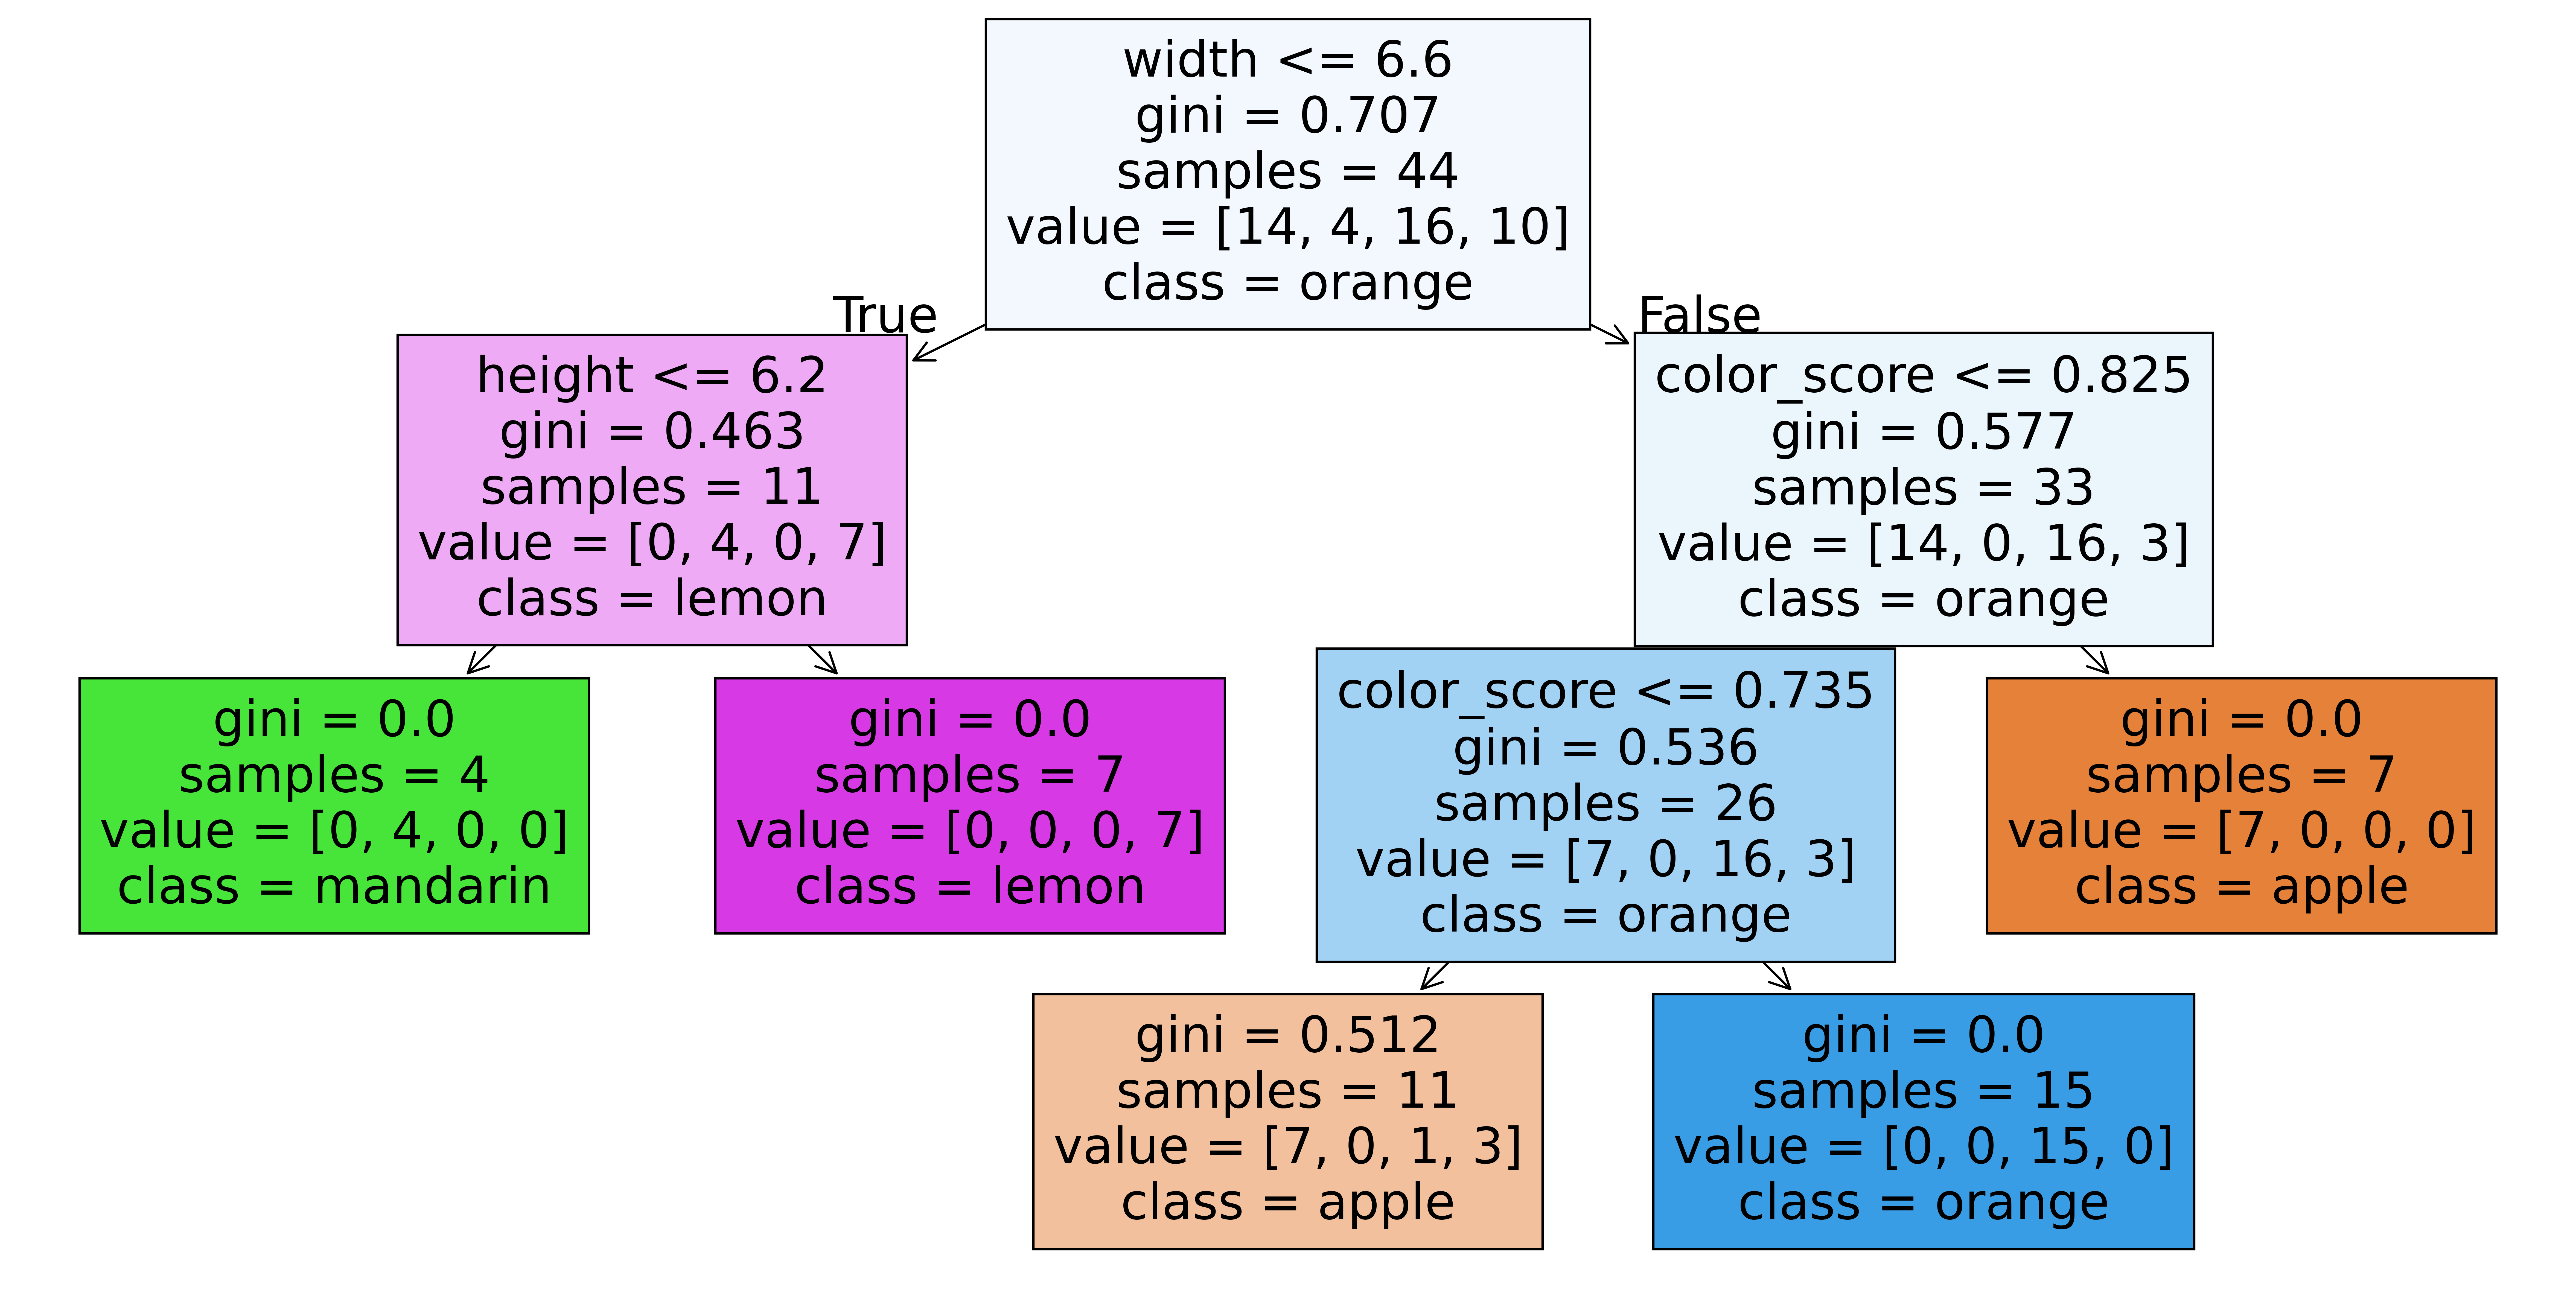

In [11]:
classes = fruit_df.sort_values('fruit_label')['fruit_name'].unique()

plt.figure(figsize=(20, 10))
plot_tree(dtc, feature_names=X_train.columns, class_names=classes, filled=True)
plt.show()

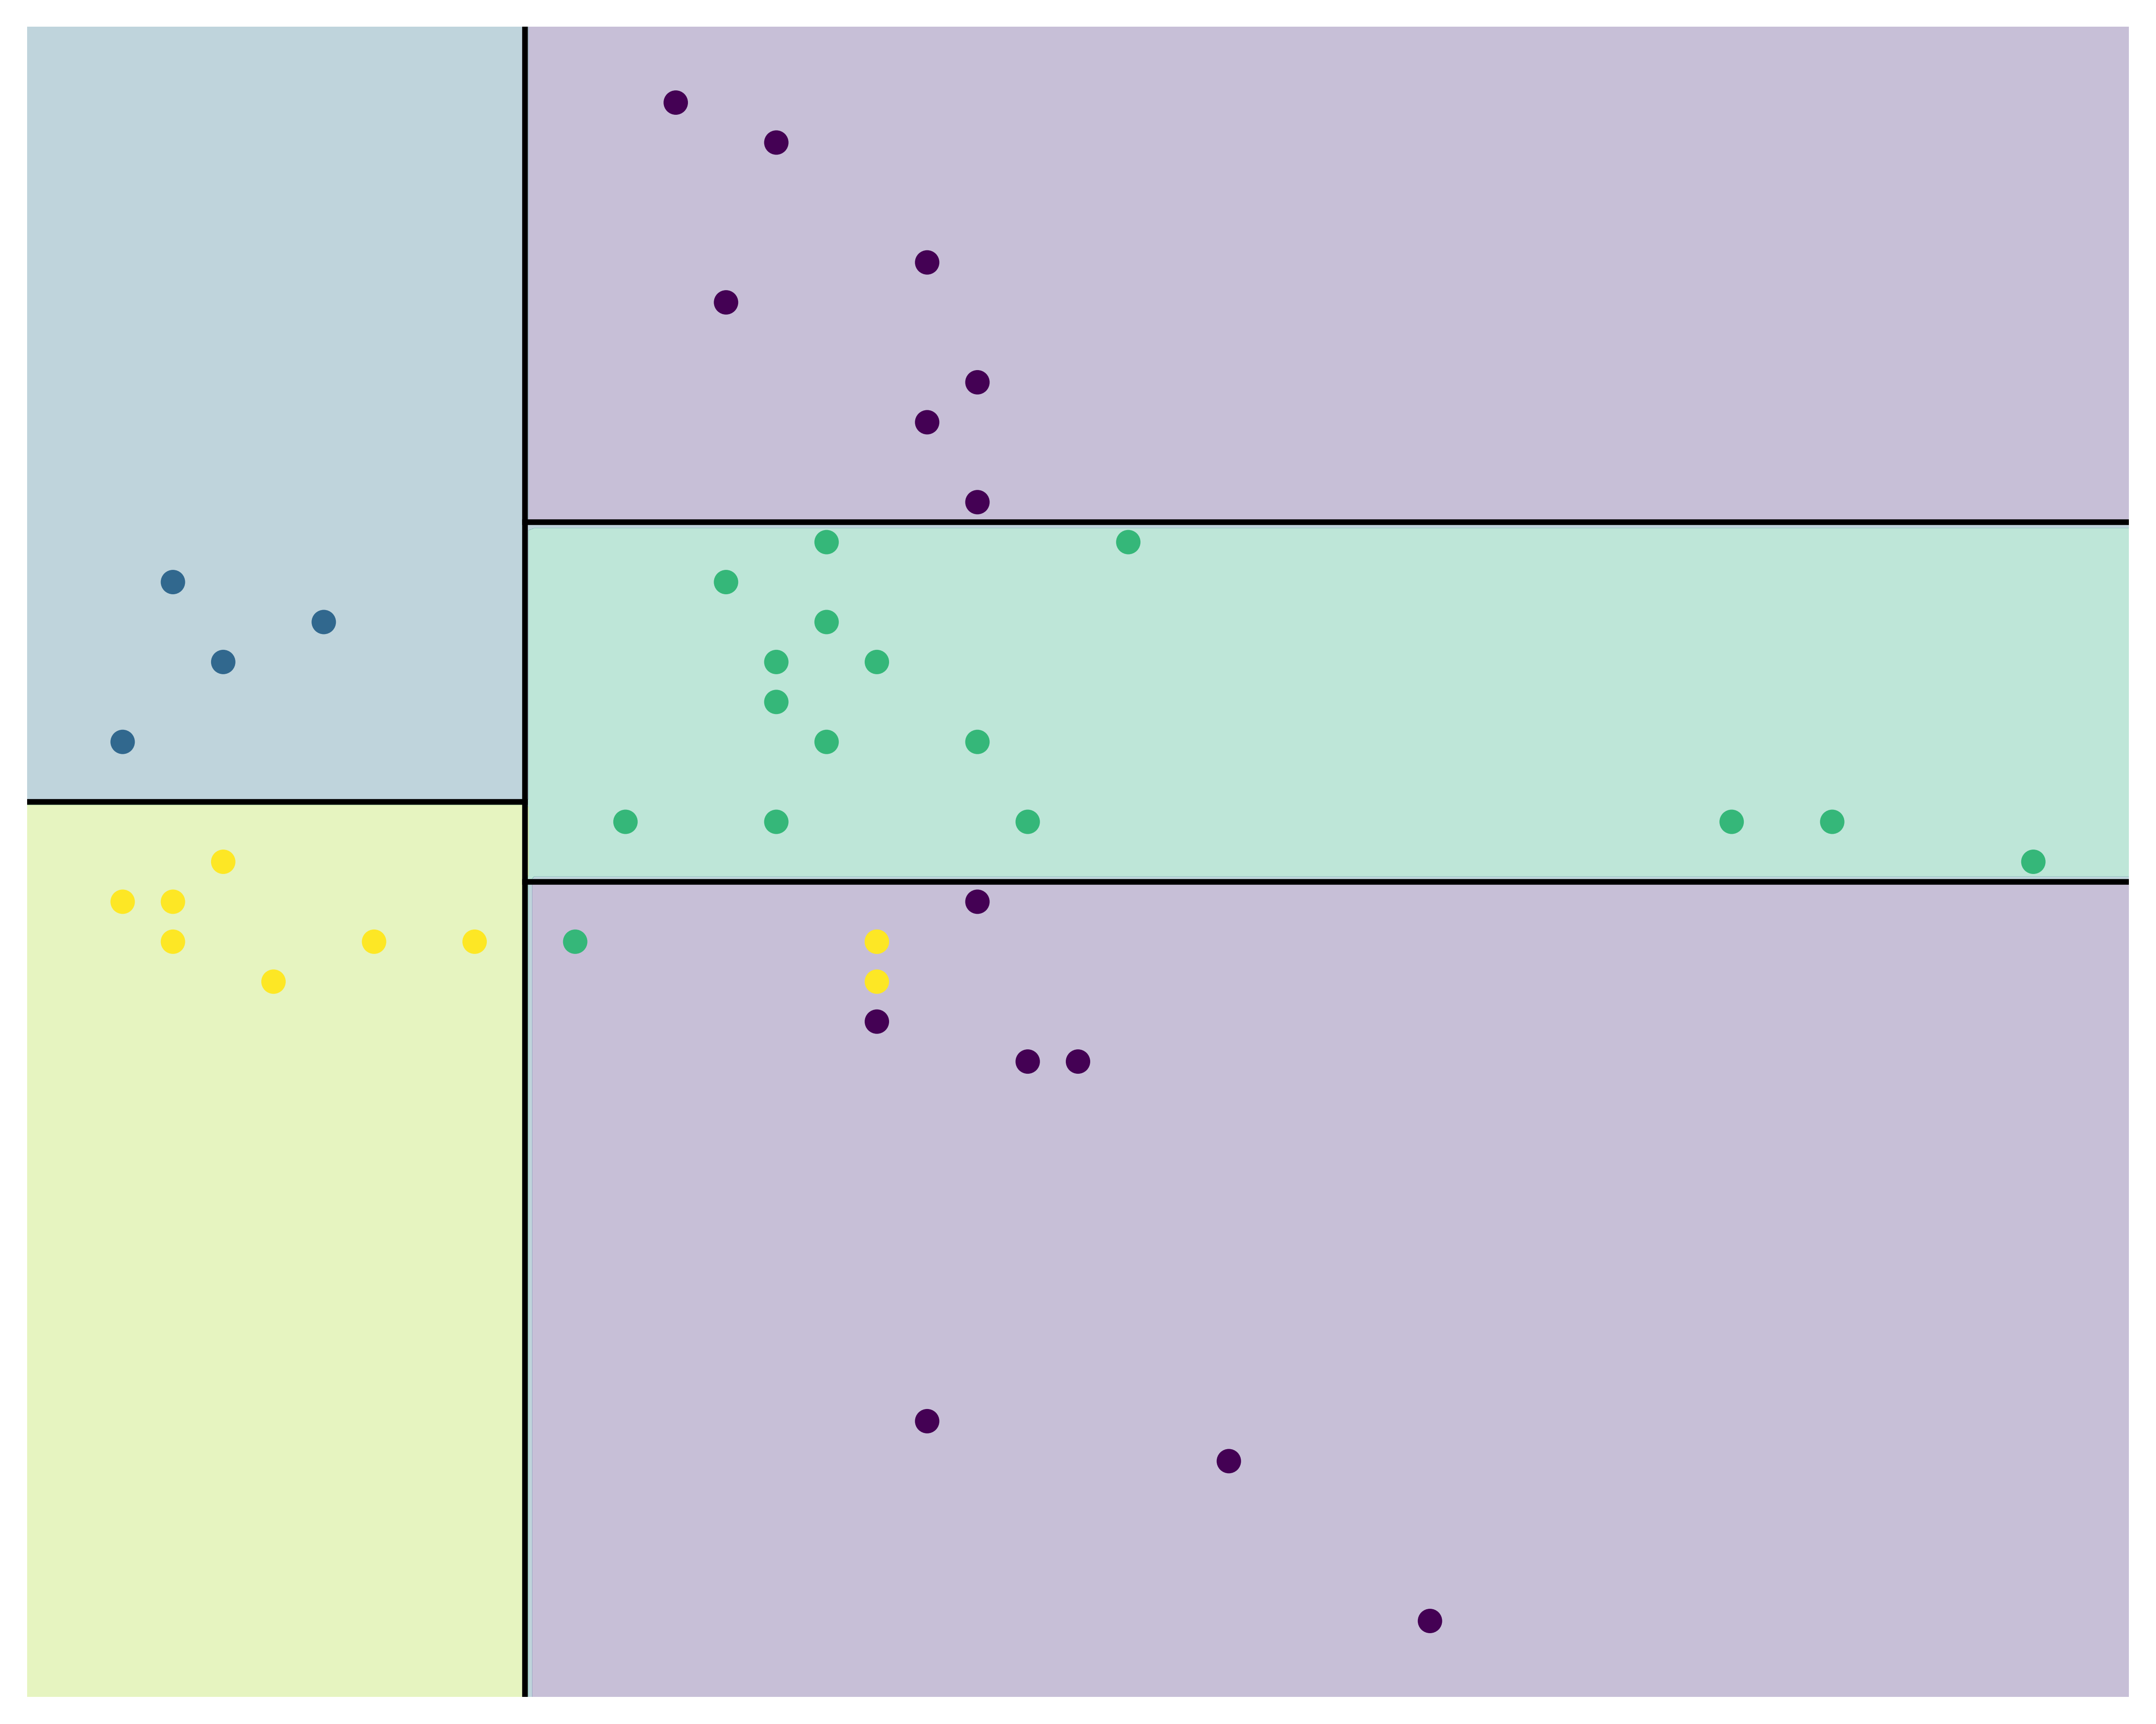

In [12]:
# code om beslissing van de boom te visualiseren - deze moet komen onder de code waarin je de beslisboom traint
# pas eventueel de variabele namen aan naar de door jou gekozen namen
le = LabelEncoder() 
y_train_label = le.fit_transform(y_train)
fig, ax = plt.subplots(1,1, figsize=(10, 8))
helpers_05_08.visualize_tree(dtc, np.array(X_train[['width', 'color_score']]), y_train_label, ax = ax)

2. Train een random forest op deze data, maak daarvoor gebruik van de RandomForestClassifier van sklearn:  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [13]:
rfc = RandomForestClassifier(max_depth=3).fit(X_train, y_train)


3. Vergelijk de train- en test accuracies van deze modellen. Welk model is beter? Maak in je antwoord gebruik van de termen *overfitting* of *underfitting*.

In [14]:
print(f"Accuracy of {dtc} on train set:", dtc.score(X_train, y_train))
print(f"Accuracy of {dtc} on test set:", dtc.score(X_test, y_test))

print(f"Accuracy of {rfc} on train set:", rfc.score(X_train, y_train))
print(f"Accuracy of {rfc} forest on test set:", rfc.score(X_test, y_test))

Accuracy of DecisionTreeClassifier(max_depth=3) on train set: 0.9090909090909091
Accuracy of DecisionTreeClassifier(max_depth=3) on test set: 0.8
Accuracy of RandomForestClassifier(max_depth=3) on train set: 1.0
Accuracy of RandomForestClassifier(max_depth=3) forest on test set: 1.0


## k-nearest neighbours (KNN)

Een ander veel gebruikt classificatie-model is k-nearest neighbors (kNN). Anders dan bij een Decision Tree of een Random forest, waarbij echt een beslis-model geleerd werd op basis van de data, is kNN een zogenoemd *instance-based* of *memory-based* model, wat betekent dat het model niet leert van de train data, maar dat het de train data zelf gebruikt om voorspellingen te doen op nieuwe data. Het idee is dat je voor een nieuwe rij kijkt naar de de dichtstbijzijnde datapunten in de trainingsdata en dat je op basis daarvan een voorspelling doet.

Dit is het makkelijkst uit te leggen met een visualisatie. Hiervoor kijken we weer naar de fruit dataset, maar nu enkel naar de features `mass` en `width`, omdat we dat goed kunnen visualiseren. 

Hieronder maken we een scatter plot waarbij we mass en width uit de trainset tegen elkaar uitzetten en we kleuren de punten op basis van de fruitsoort. Daarnaast worden 2 zwarte sterren uit de testset getoond. Kun je zelf op basis van de visualisatie al bepalen bij welke fruitsoort deze zou horen?

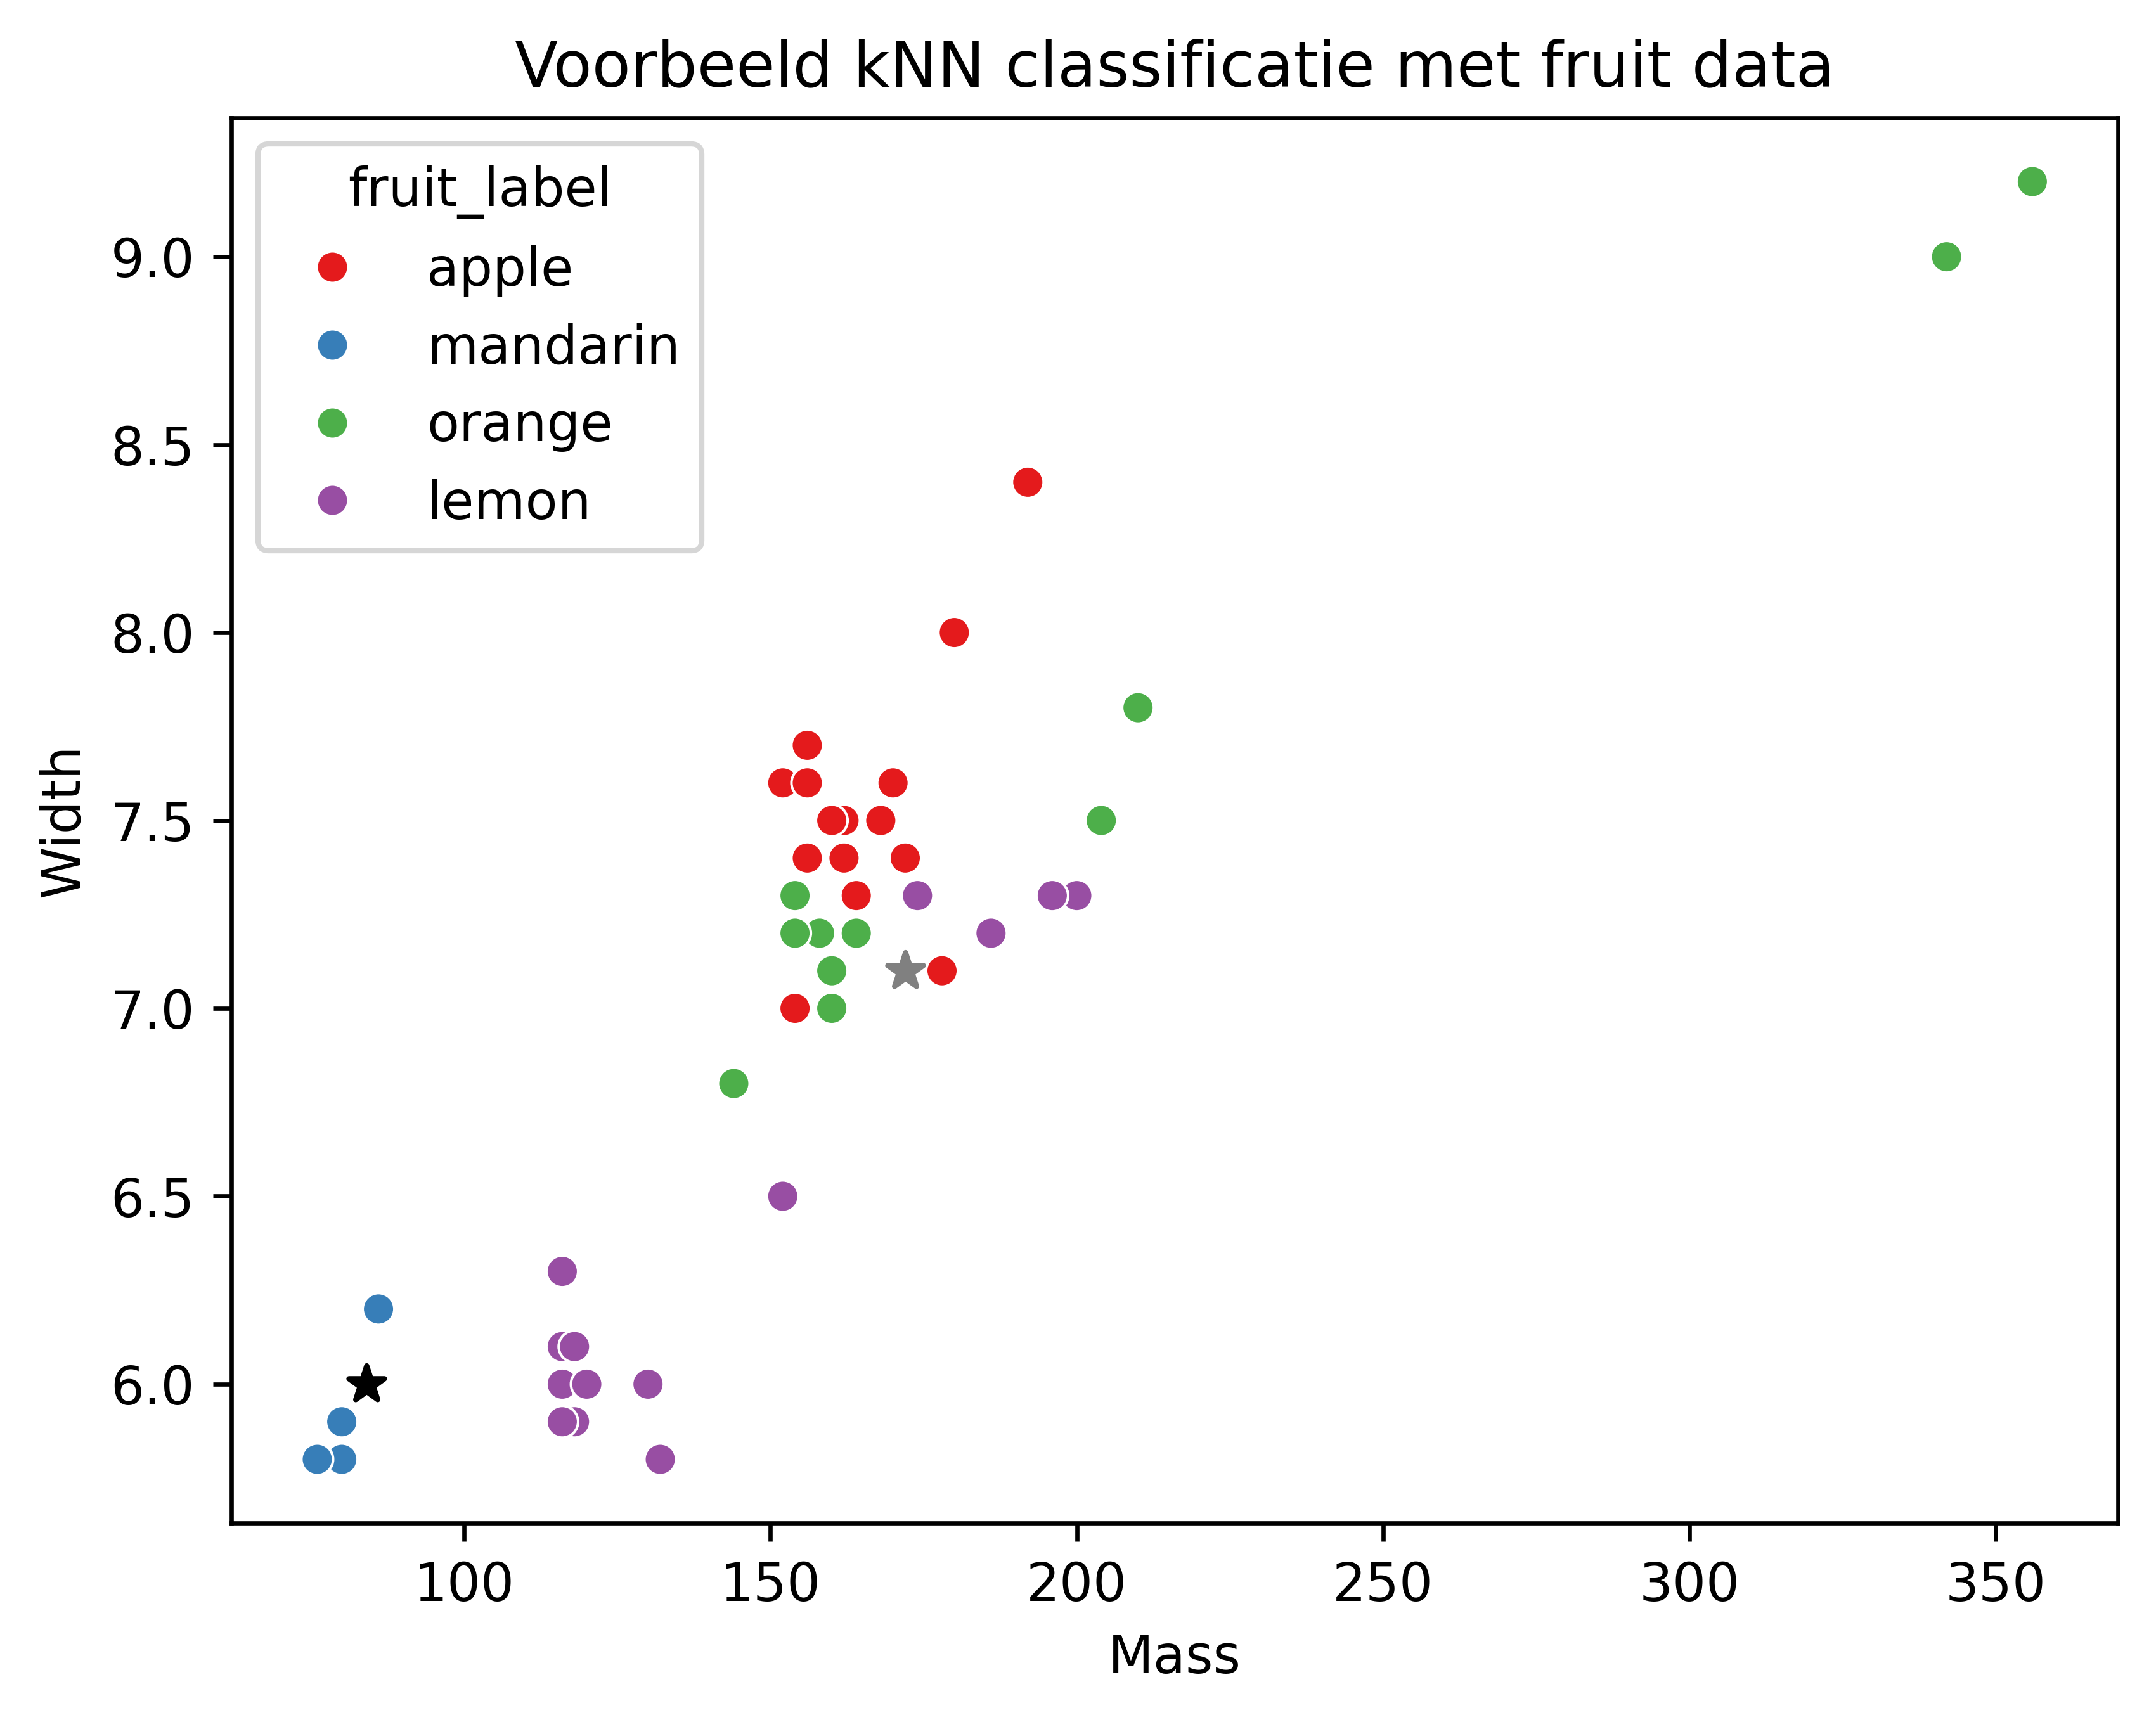

In [15]:
X_fruit_2d = fruit_df[['mass','width']]
y_fruit_2d = fruit_df['fruit_label']

# Voeg fruitnamen toe voor de legenda
fruit_names_map = fruit_df[['fruit_label', 'fruit_name']].drop_duplicates().set_index('fruit_label')['fruit_name'].to_dict()
fruit_names_for_plot = y_fruit_2d.map(fruit_names_map)

# Train-test split
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_fruit_2d, y_fruit_2d, test_size=0.25, random_state=0)

# Plot de trainset
sns.scatterplot(x=X_train_2d['mass'], y=X_train_2d['width'], hue=fruit_names_for_plot, palette='Set1' )

# Plot nieuwe punten uit de testset
plt.scatter(x=X_test_2d.loc[4]['mass'], y=X_test_2d.loc[4]['width'], marker = '*', color='black', s=50)
plt.scatter(x=X_test_2d.loc[11]['mass'], y=X_test_2d.loc[11]['width'], marker = '*', color='grey', s=50)
plt.xlabel('Mass')
plt.ylabel('Width')
plt.title('Voorbeeld kNN classificatie met fruit data')
plt.show()

De gekleurde punten zijn onze bekende fruitvoorbeelden. De sterren zijn nieuwe, ongeziene fruitstukken waarvan we de soort willen voorspellen.

KNN werkt door te kijken naar de *k* dichtstbijzijnde bekende punten (buren) rond een nieuw punt. De 'target' (fruitsoort) die het meest voorkomt onder deze $k$ buren, wordt de voorspelling voor het nieuwe punt.

*   Bij de zwarte ster zie je duidelijk dat de dichtstbijzijnde punten allemaal blauw zijn. Voor vrijwel elke redelijke waarde van $k$ zal de voorspelling dus `mandarin` zijn.
*   Bij de grijze liggen er zowel rode als groene als paarse punten in de buurt. De voorspelling hangt hier sterk af van de exacte positie en de gekozen waarde van $k$. Als $k=1$, kijk je naar het dichtstbijzijnde punt en zal de voorspelling `apple` zijn. Als $k=5$, tel je de soorten van de 5 dichtstbijzijnde punten en neem je de meerderheid. Wat is de voorspelling dan?

> Vermoedelijk `orange`, er lijken 3 van de 5 punten dichtbij de grijze ster groen te zijn.

Uiteraard hoeven we niet handmatig in een plaatje te gaan zoeken naar de dichtsbijzijnde buren, maar ook hier is een `sklearn` model voor beschikbaar. Zie: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

### ML Opdracht 2.4
Train een kNN op de fruit data. Gebruik voor de voorspelling de 3 dichtsbijzijnde buren (dus $k=3$). Gebruik als features `mass`, `width`, `height`, en `color_score` en de target is nog steeds de `fruit_label`. Bepaal de train- en de testscore. Is deze beter of slechter dan de random forest?

In [16]:
print(len(X_train))
X_train.sample()

44


mass  width  height  color_score
3    86    6.2     4.7          0.8

In [17]:
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train, y_train)

print(f"Accuracy of {knc} on train set:", knc.score(X_train, y_train))
print(f"Accuracy of {knc} on test set:", knc.score(X_test, y_test))

Accuracy of KNeighborsClassifier(n_neighbors=3) on train set: 0.8181818181818182
Accuracy of KNeighborsClassifier(n_neighbors=3) on test set: 0.5333333333333333


Zoals je waarschijnlijk in de vorige opdracht gezien hebt, presteert de random forest ten opzichte van de kNN nog niet zo best. Misschien helpt het als we een andere $k$ nemen? Het zoeken naar de juiste parameters voor een model heet *hyperparameter tuning*. Dit kun je voor iedere hyperparameter van een model doen (denk aan de `max_depth` van de decision tree), maar je gaat dit nu doen voor de $k$ van kNN.

### ML Opdracht 2.5
Schrijf een for-loop die een kNN model traint voor $k=1$ t/m $k=5$. Bepaal telkens de train en de testaccuracy. Welke $k$ is het beste?

In [18]:
for k in range(1, 6, 2):
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(X_train, y_train)

    print(f"Accuracy of {knc} on train set:", knc.score(X_train, y_train))
    print(f"Accuracy of {knc} on test set:", knc.score(X_test, y_test), end="\n\n")

Accuracy of KNeighborsClassifier(n_neighbors=1) on train set: 1.0
Accuracy of KNeighborsClassifier(n_neighbors=1) on test set: 0.6666666666666666

Accuracy of KNeighborsClassifier(n_neighbors=3) on train set: 0.8181818181818182
Accuracy of KNeighborsClassifier(n_neighbors=3) on test set: 0.5333333333333333

Accuracy of KNeighborsClassifier() on train set: 0.7727272727272727
Accuracy of KNeighborsClassifier() on test set: 0.4666666666666667



### Overfitten op de testset
In de vorige opdracht heb je de testset gebruikt om de hyperparameters van je model te kiezen. Dit is eigenlijk geen goede aanpak, omdat je hiermee het model (of eigenlijk de hyperparameters) afstemt op de specifieke kenmerken van de testset. Hierdoor presteert het model mogelijk wel goed op juist die testset, maar weet je nog niet zeker of deze goed gaat generaliseren naar nieuwe, ongeziene data. De testaccuracy is dus waarschijnlijk hoger dan de werkelijke accruracy van je model. Dit fenomeen noemen we ook wel *overfitting op de testset*.

Dit is overigens een veel gemaakte fout in de data science wereld. Dat je heel enthousiast een hoge accuracy presenteert aan je opdrachtgever, maar als hij vervolgens het model daadwerkelijk gaat gebruiken om nieuwe data te classificeren, dan blijkt de werkelijke voorspellende waarde van het model een stuk lager te zijn. Dat wil je natuurlijk niet.

De manier om dit te voorkomen, is door bij het uitproberen van iedere $k$ (of andere hyperparameter bij een ander model), je train-set opnieuw in tweeën te splitsen. Je splitst deze dan in een daadwerkelijke trainset en in een zogenoemde *validatie*-set. Je berekent dan voor iedere $k$ de accuracy op de validatieset en je kiest de $k$ met de hoogste validatie score. Vervolgens bereken je voor dat model de test accuracy. Dit is dan de echte accuracy van je model en je mag ervan uit gaan dat deze ook op nieuwe ongeziene data deze accuracy zal behalen.

### ML Opdracht 2.6
Schrijf een nieuwe for-loop die telkens een kNN model traint voor $k=1$ t/m $k=5$. Voordat je .fit aanroept, splits je de trainingsset in een train- en een validatieset. Bepaal voor welke $k$ de score op de validatieset het hoogst is. Bereken voor die $k$ de test accuracy.

In [19]:
best_accuracy = 0
best_k = 0

for k in range(1, 12, 2):
    X_train_k, X_valid, y_train_k, y_valid = train_test_split(X_train, y_train)
    print(f"Train set: n = {len(y_train_k)}; validation set: n = {len(y_valid)}, test set: n = {len(y_test)}; data set: n = {len(fruit_df)}")

    # print(X_train_k)

    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(X_train_k, y_train_k)

    valid_accuracy = knc.score(X_valid, y_valid)
    if valid_accuracy > best_accuracy:
        best_accuracy = valid_accuracy
        best_k = k

    print(f"Accuracy of {knc} on train set:", knc.score(X_train_k, y_train_k))
    print(f"Accuracy of {knc} on validation set:", valid_accuracy, end="\n\n")

print(f"Best parameter: k = {best_k}")

knc = KNeighborsClassifier(n_neighbors=best_k)
knc.fit(X_train, y_train)
print(f"Accuracy of {knc} on test set:", knc.score(X_test, y_test), end="\n\n")


Train set: n = 33; validation set: n = 11, test set: n = 15; data set: n = 59
Accuracy of KNeighborsClassifier(n_neighbors=1) on train set: 1.0
Accuracy of KNeighborsClassifier(n_neighbors=1) on validation set: 0.9090909090909091

Train set: n = 33; validation set: n = 11, test set: n = 15; data set: n = 59
Accuracy of KNeighborsClassifier(n_neighbors=3) on train set: 0.8181818181818182
Accuracy of KNeighborsClassifier(n_neighbors=3) on validation set: 0.6363636363636364

Train set: n = 33; validation set: n = 11, test set: n = 15; data set: n = 59
Accuracy of KNeighborsClassifier() on train set: 0.696969696969697
Accuracy of KNeighborsClassifier() on validation set: 0.6363636363636364

Train set: n = 33; validation set: n = 11, test set: n = 15; data set: n = 59
Accuracy of KNeighborsClassifier(n_neighbors=7) on train set: 0.7878787878787878
Accuracy of KNeighborsClassifier(n_neighbors=7) on validation set: 0.5454545454545454

Train set: n = 33; validation set: n = 11, test set: n = 1

Waarschijnlijk heb je gevonden dat de accuracy op de test set vrij laag is. In dit geval kunnen we hier weinig waarde aan hechten, en dat komt vooral omdat de dataset die we hier gebruiken erg klein is. Run de code voor hyperparameter tuning maar eens een paar keer, met telkens een andere seed (of random state) en je zult telkens een andere optimale $k$ krijgen. Dat komt doordat er maar zo weinig data in de validatie set zit, dat kleine variaties in de data voor grote verschillen in accuracy kunnen zorgen. 
Een les die je hieruit kunt leren is: voor het maken van betrouwbare modellen heb je veel data nodig! Maar hopelijk heeft dit voorbeeld je wel geholpen om het principe van hyperparameter tuning met een train-, validatie- en testset te begrijpen. En een belangrijke les hierbij is: houd je testset apart tot het allerlaatst!

### Data preparatie - feature scaling

We zijn nog niet diep ingegaan op hoe het kNN algoritme de $k$ dichtsbijzijnde buren bepaalt. Intuitief weet je wel wat 'dichtbij' betekent, wiskundig komt dit neer op het bepalen welke punten de kleinste *Euclidische* afstand hebben tot het punt dat je wilt classificeren. 
De Euclidische afstand tussen het punten $p_1$ (met coordinaten $(x_1, y_1)$) en $p_2$ met coordinaten $(x_2, y_2)$ bereken je met:
$$d(p_1, p_2) = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$$
Hierbij staat $d(p_1,p_2)$ voor de afstand tussen de punten $p_1$ en $p_2$.

Voorbeeld: 
De afstand tussen het punt (1, 2) en het punt (4, 6) is:
$$d((1, 2), (4, 6)) = \sqrt{(1 - 4)^2 + (2 - 6)^2} = \sqrt{(-3)^2 + (-4)^2} = \sqrt{9 + 16} = \sqrt{25} = 5$$
Dit is eigenlijk niks anders dan het toepassen van de stelling van Pythagoras.

Een voorbeeld uit de fruitdataset:

Nemen we een appel met mass = 140 en width = 7.0 en een mandarijn met mass = 80 en width = 5.8, dan is de afstand tussen deze twee punten:
$$ d(appel, mandarijn) = \sqrt{(140 - 80)^2 + (7.0 - 5.8)^2} = \sqrt{(60)^2 + (1.2)^2} = \sqrt{3600 + 1.44} = \sqrt{3601.44} = 60.01$$


Wat je hier (hopelijk) al bij opvalt is dat de `mass` hier veel bepalender is voor de afstand tussen de punten dan de `width`. Dat komt omdat deze een andere eenheid hebben (gram en centimeter). Hierdoor is de feature met de grootste schaal (in dit geval `mass`) van veel grotere invloed op het bepalen van de dichtsbijzijnde buren dan de `width` feature. Dit wil je eigenlijk niet.

Een manier om dit op te lossen is door je features te schalen, bijvoorbeeld door ze te normaliseren. Hierbij deel je alle waarden van een feature door de maximale waarde van die feature. Daarmee zorg je dat de features allemaal tussen 0 en 1 liggen. (of tussen -1 en 1 als je ook negatieve waarden hebt). Er zijn ook andere technieken om je features te schalen, met allemaal andere voor- en nadelen. Een uitgebreide uitleg vind je bijvoorbeeld hier: https://www.datacamp.com/tutorial/normalization-vs-standardization. Ik raad je aan deze manieren verder uit te zoeken als je het nodig gaat hebben in je project. 

Voor nu gaan we het normaliseren toepassen op de fuit dataset. Hierbij is het belangrijk dat je bij het normaliseren het maximum van de train-set bepaalt (de testset beschouw je als nieuwe data, en die heb je nog niet gezien). Vervolgens gebruik je ook het maximum van de train-set om de test-set te schalen. In de volgens opdacht loop je door de stappen heen.

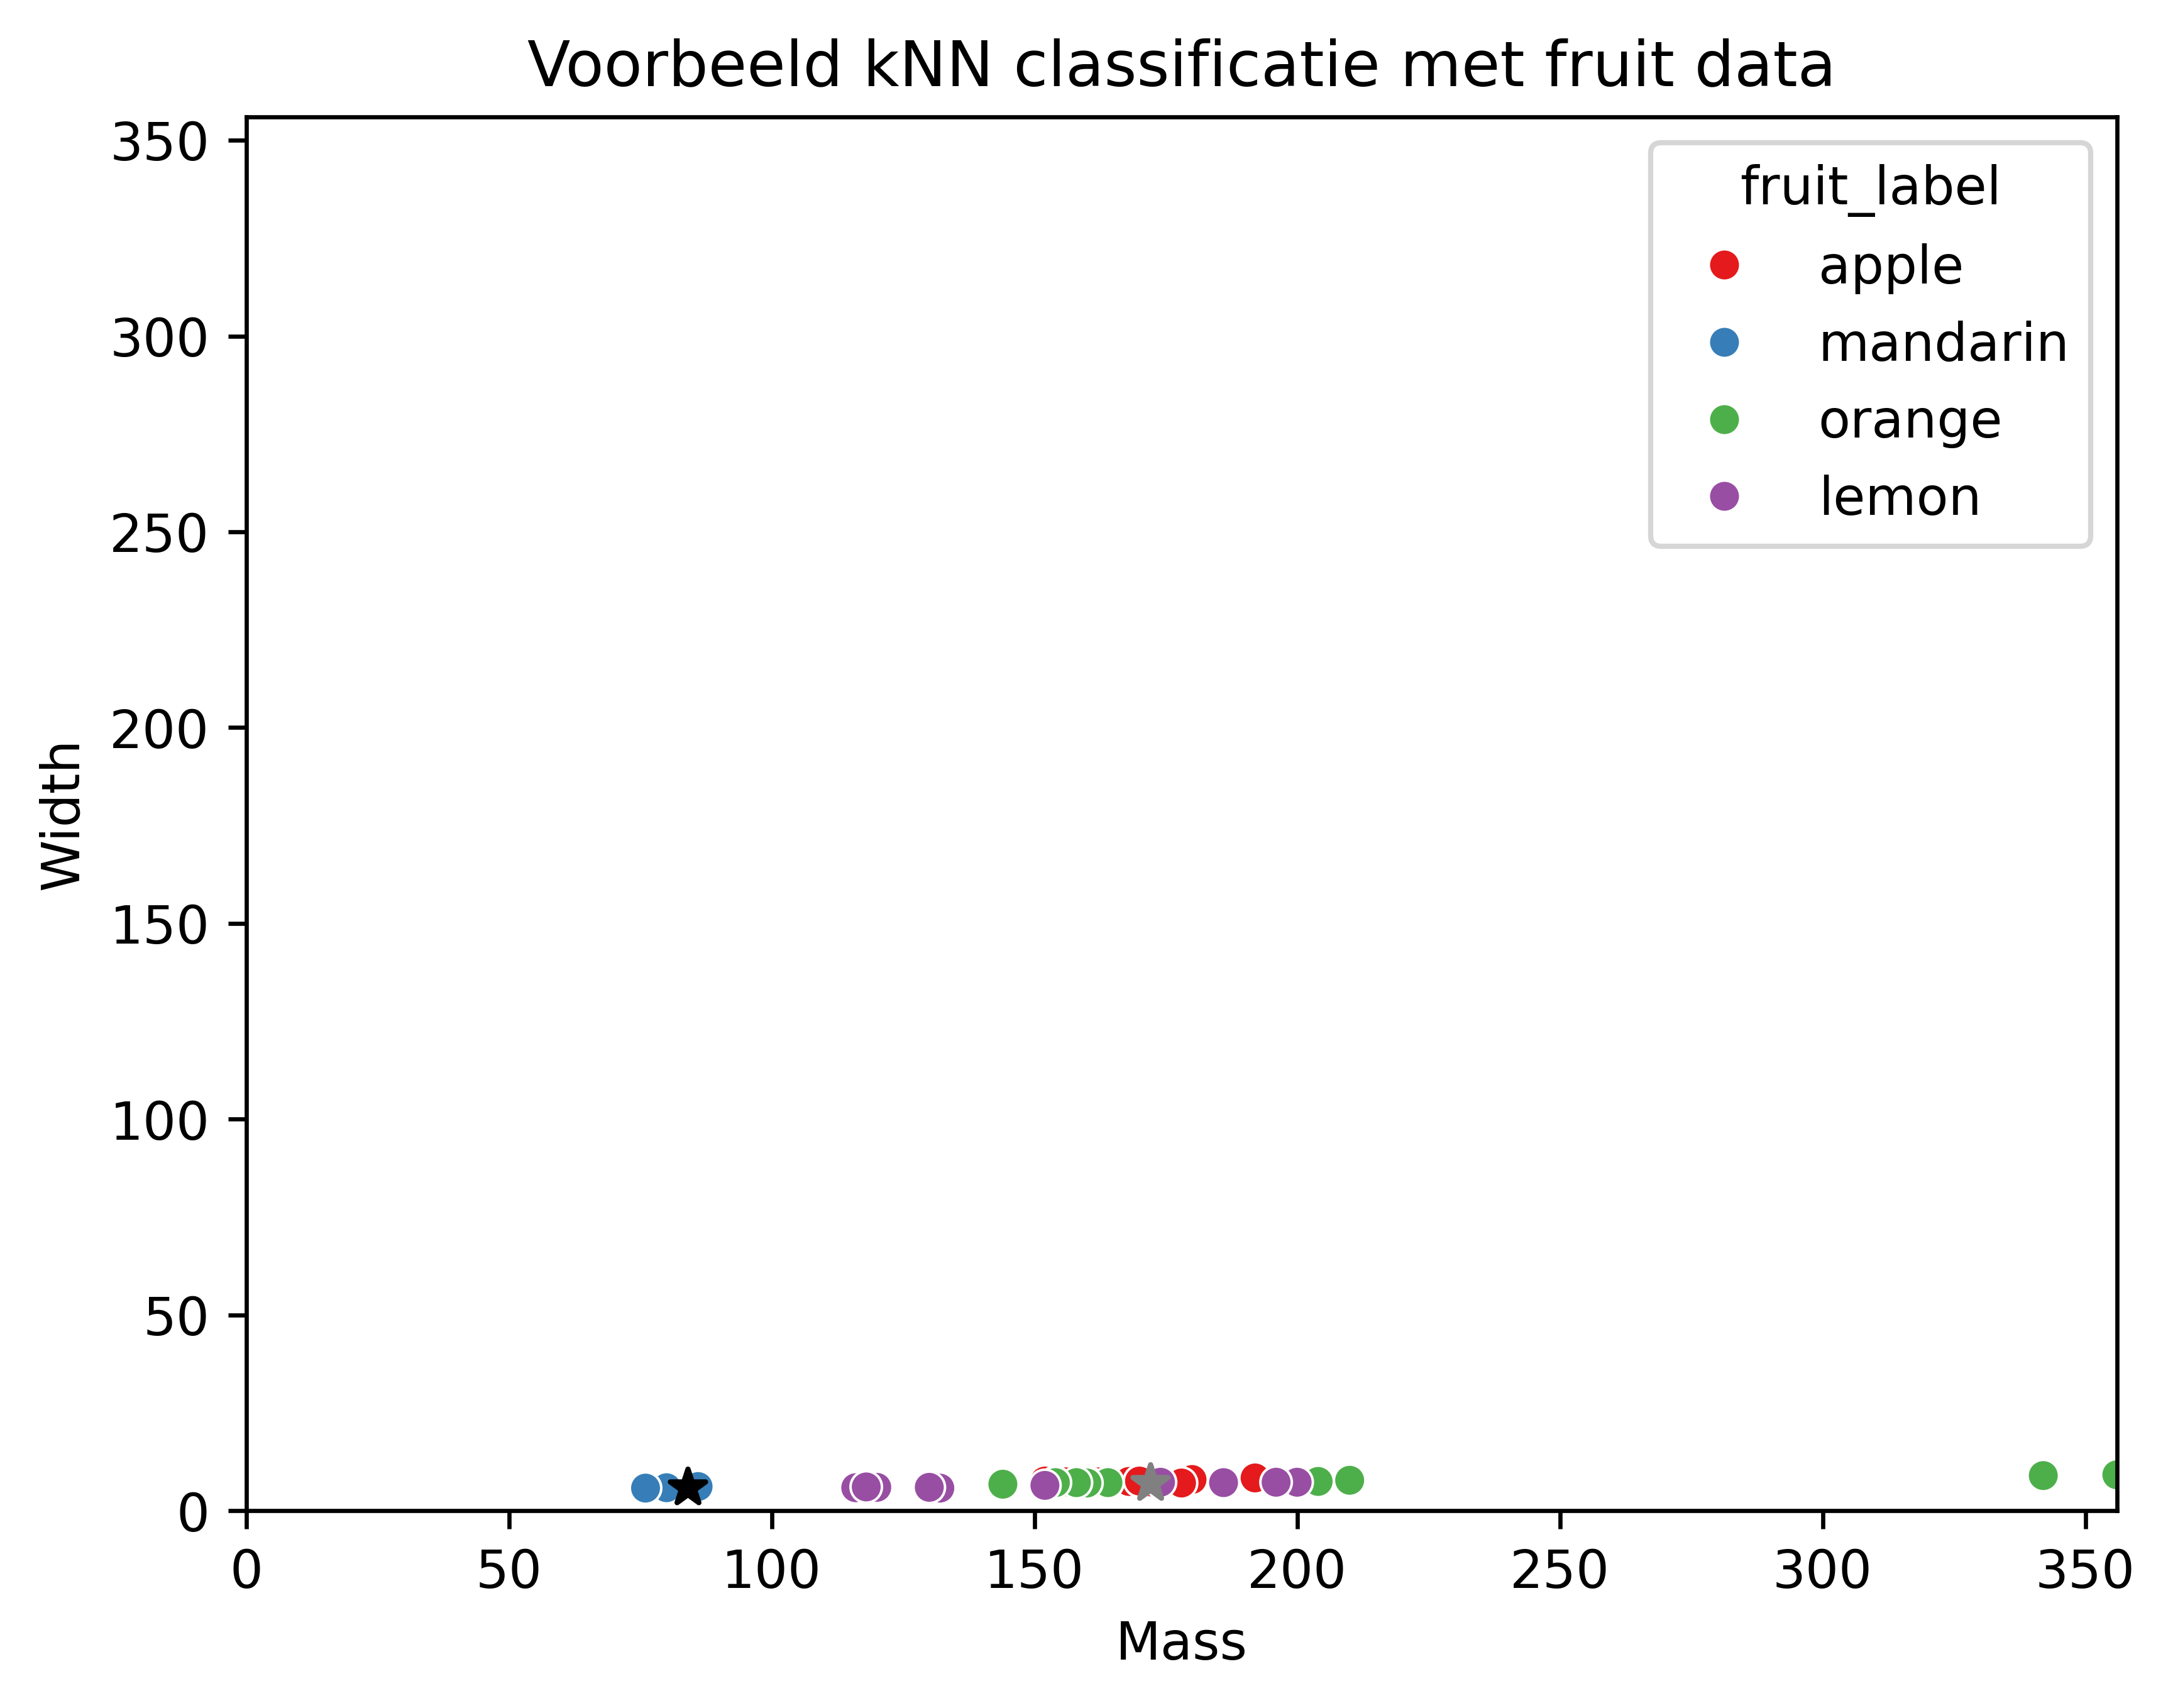

In [20]:
X_fruit_2d = fruit_df[['mass','width']]
y_fruit_2d = fruit_df['fruit_label']

# Voeg fruitnamen toe voor de legenda
fruit_names_map = fruit_df[['fruit_label', 'fruit_name']].drop_duplicates().set_index('fruit_label')['fruit_name'].to_dict()
fruit_names_for_plot = y_fruit_2d.map(fruit_names_map)

# Train-test split
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_fruit_2d, y_fruit_2d, test_size=0.25, random_state=0)

# Plot de trainset
sns.scatterplot(x=X_train_2d['mass'], y=X_train_2d['width'], hue=fruit_names_for_plot, palette='Set1' )

max_tick = max(X_train_2d['mass'].max(), X_train_2d['width'].max())


# Plot nieuwe punten uit de testset
plt.scatter(x=X_test_2d.loc[4]['mass'], y=X_test_2d.loc[4]['width'], marker = '*', color='black', s=50)
plt.scatter(x=X_test_2d.loc[11]['mass'], y=X_test_2d.loc[11]['width'], marker = '*', color='grey', s=50)
plt.xlabel('Mass')
plt.ylabel('Width')

plt.xlim(0, max_tick)
plt.ylim(0, max_tick)

plt.title('Voorbeeld kNN classificatie met fruit data')
plt.show()

### ML Opdracht 2.7
1. Definieer een dataset X met de features `mass`, `width`, `height` en `color_score` en een target y met de labels van de fruitsoorten uit `fruit_df`.
2. Splits de data in een train- en testset met een 70/30 split.
3. Bepaal van iedere feature het maximum van de train set en gebruik deze om een geschaalde train-set te maken.
4. Train een kNN model met k=3 op de geschaalde train set.
5. Gebruik de maxima die je in stap 3 hebt gevonden om de test set te schalen.
6. Gebruik de geschaalde test set om de test accuracy van het model te bepalen. Is deze beter dan we hierboven gevonden hadden?
7. Zou de performance van een decision tree of een random forest verbeteren als je de features gaat schalen?

In [21]:
import random 
random.seed(0)

fruit_df = pd.read_table('../databronnen/knn_fruit.txt')
fruit_df.sample()

X_fruit = fruit_df[['mass', 'width', 'height', 'color_score']]
y_fruit = fruit_df.fruit_label

print(y_fruit.sample())
X_fruit.sample()

0    1
Name: fruit_label, dtype: int64


mass  width  height  color_score
34   142    7.6     7.8         0.75

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_fruit, y_fruit, test_size=.3)

print(X_train.max())

X_train_std = X_train / X_train.max()
X_train_std.sample()


mass           342.00
width            9.00
height          10.50
color_score      0.93
dtype: float64


mass     width    height  color_score
1  0.526316  0.888889  0.647619     0.634409

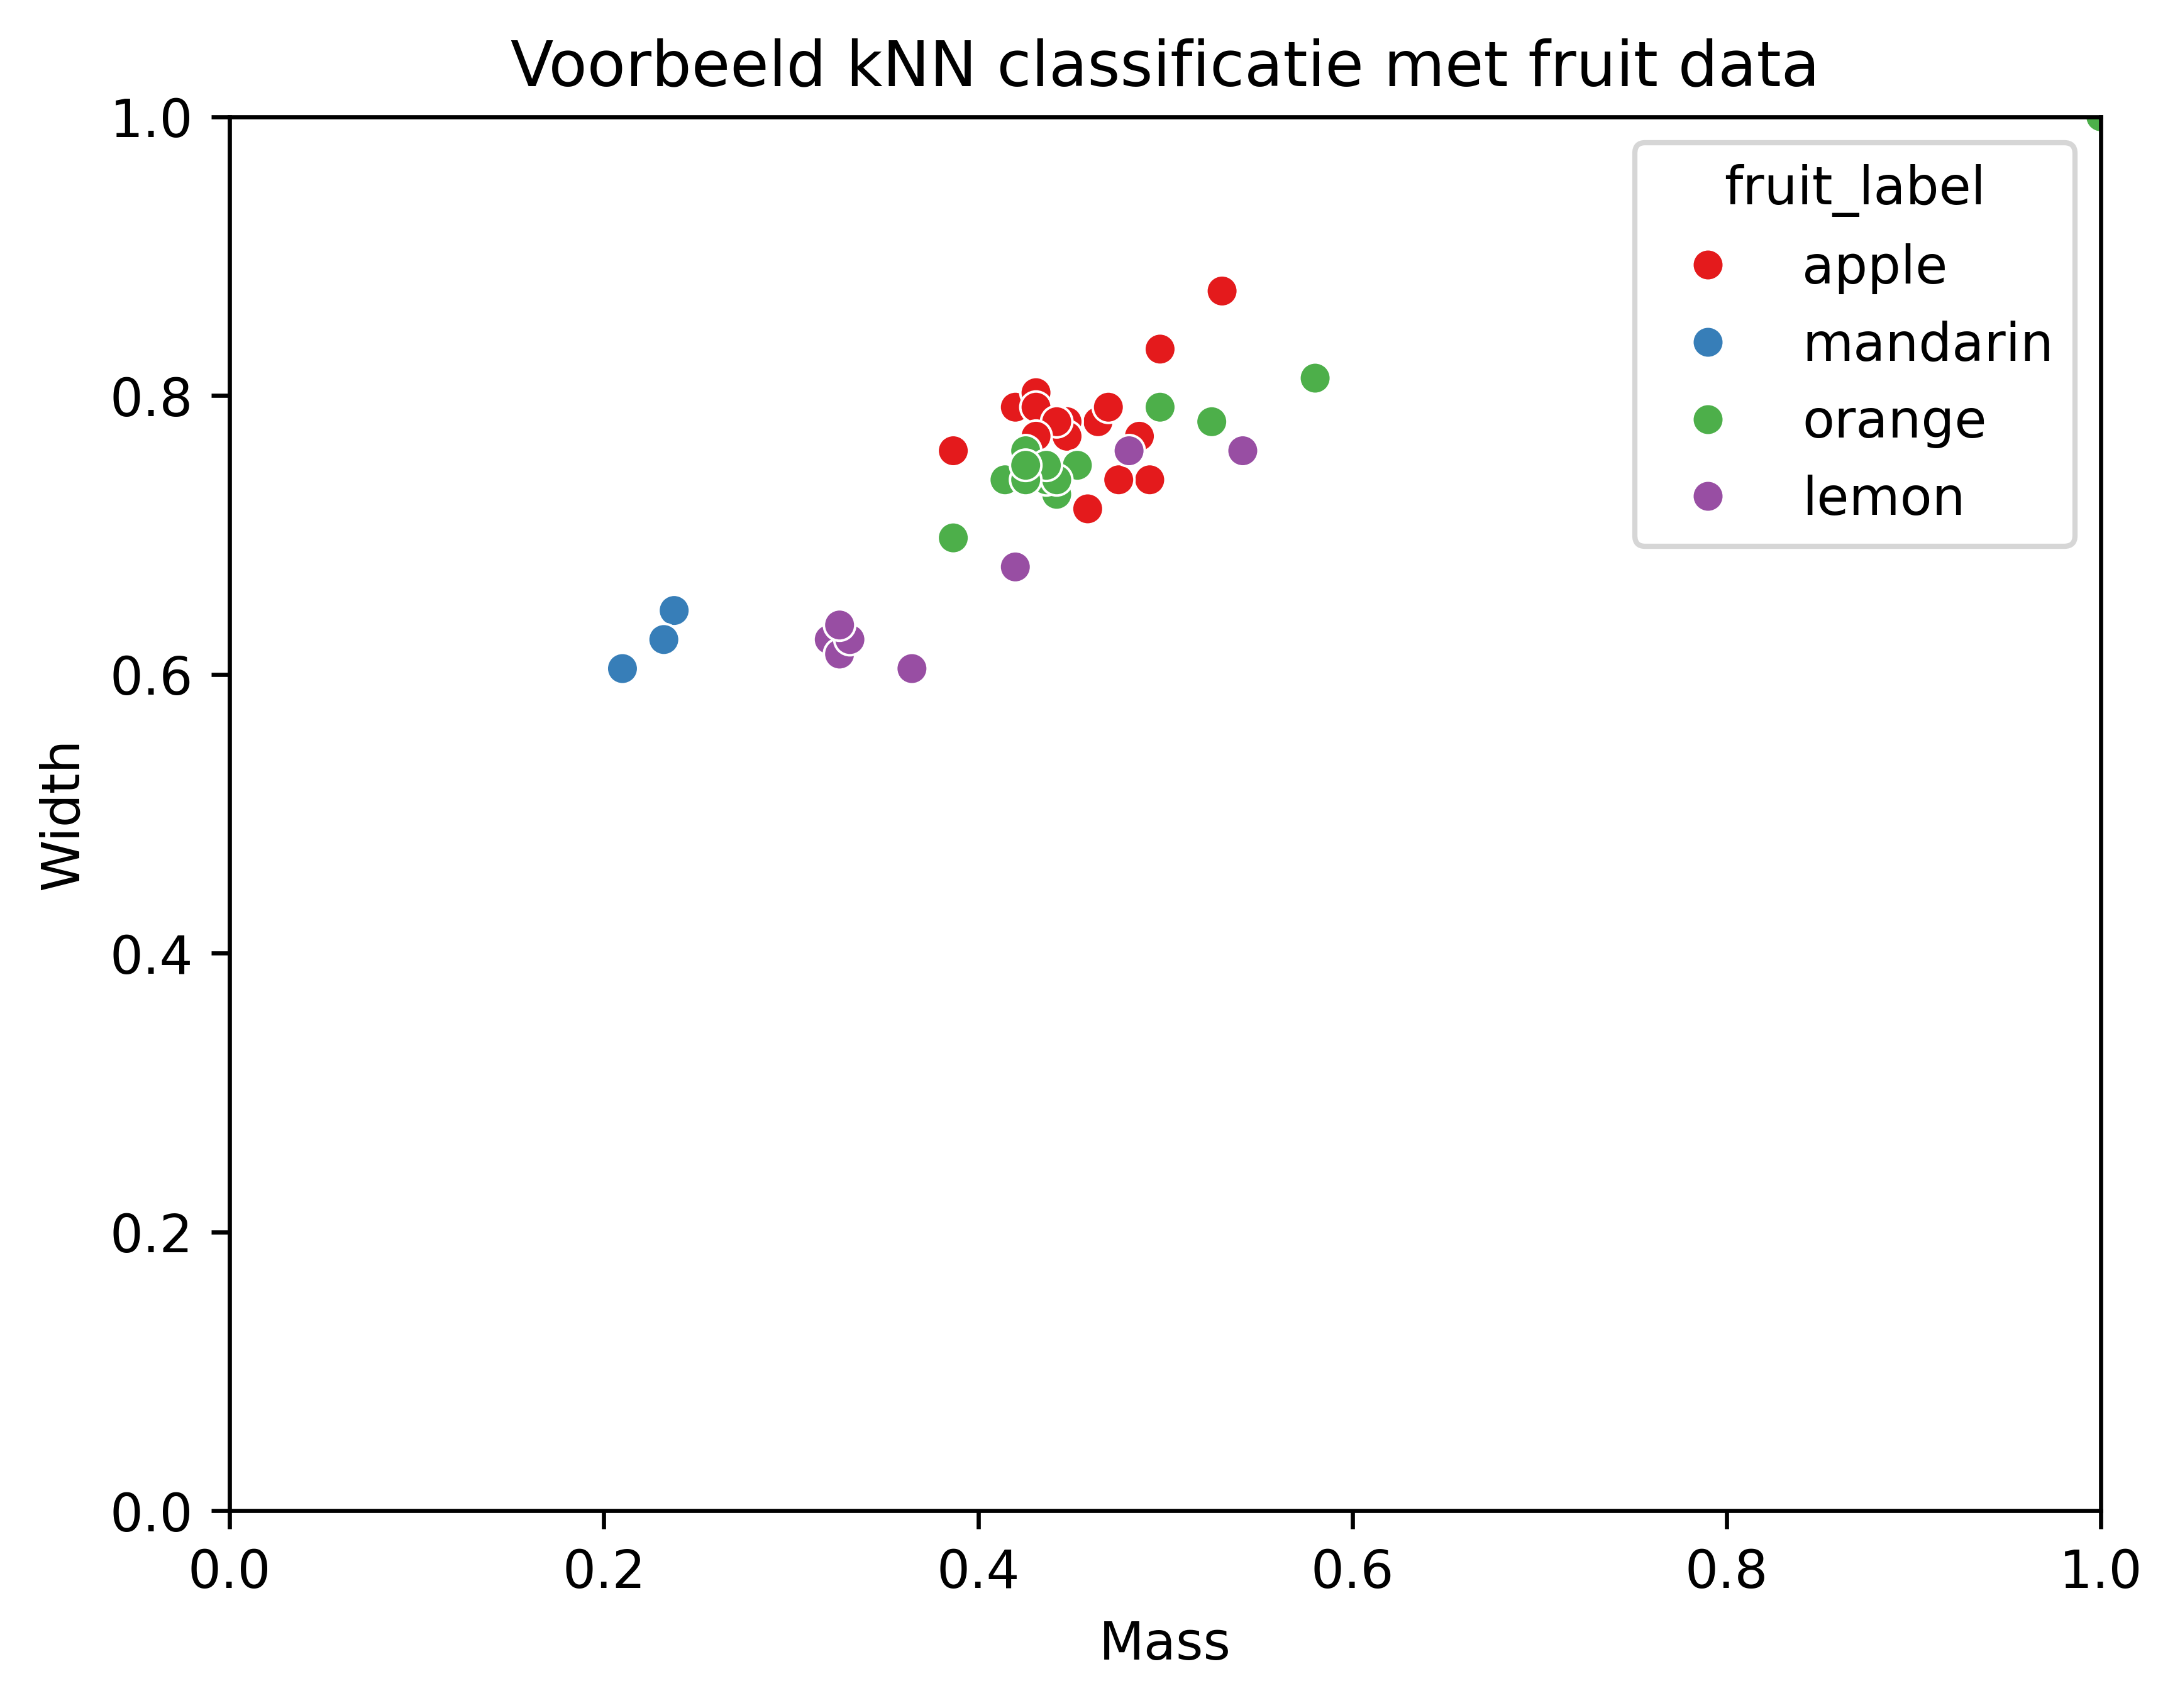

In [23]:
# Plot de trainset
sns.scatterplot(x=X_train_std['mass'], y=X_train_std['width'], hue=fruit_names_for_plot, palette='Set1' )

max_tick = max(X_train_std['mass'].max(), X_train_std['width'].max())

# Plot nieuwe punten uit de testset
plt.xlabel('Mass')
plt.ylabel('Width')

plt.xlim(0, max_tick)
plt.ylim(0, max_tick)

plt.title('Voorbeeld kNN classificatie met fruit data')
plt.show()

In [25]:
X_test_std = X_test / X_train.max()

# Merk op dat hier de gestandaardiseerde waarde niet noodzakelijk tussen 0 en 1 liggen.
for col in X_test_std.columns:
    print(f"Max value in column {col}:\n", 
          X_train_std[X_train_std[col] == X_train_std[col].max()], '\n',
          X_test_std[X_test_std[col] == X_test_std[col].max()], 
          end="\n\n")

Max value in column mass:
     mass  width    height  color_score
26   1.0    1.0  0.910891     0.795699 
         mass     width    height  color_score
25  0.983425  0.958333  0.910891     0.806452

Max value in column width:
     mass  width    height  color_score
26   1.0    1.0  0.910891     0.795699 
         mass     width    height  color_score
25  0.983425  0.958333  0.910891     0.806452

Max value in column height:
         mass     width  height  color_score
48  0.480663  0.760417     1.0     0.774194 
         mass     width    height  color_score
44  0.552486  0.760417  1.039604     0.774194

Max value in column color_score:
         mass    width    height  color_score
10  0.458564  0.71875  0.722772          1.0 
        mass     width    height  color_score
9  0.475138  0.770833  0.693069     0.956989



In [26]:
for k in range(1, 8, 2):
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(X_train_std, y_train)

    print(f"Accuracy of {knc} on train set:", knc.score(X_train_std, y_train))
    print(f"Accuracy of {knc} on test set:", knc.score(X_test_std, y_test), end="\n\n")


Accuracy of KNeighborsClassifier(n_neighbors=1) on train set: 1.0
Accuracy of KNeighborsClassifier(n_neighbors=1) on test set: 0.9444444444444444

Accuracy of KNeighborsClassifier(n_neighbors=3) on train set: 0.975609756097561
Accuracy of KNeighborsClassifier(n_neighbors=3) on test set: 1.0

Accuracy of KNeighborsClassifier() on train set: 1.0
Accuracy of KNeighborsClassifier() on test set: 0.9444444444444444

Accuracy of KNeighborsClassifier(n_neighbors=7) on train set: 0.926829268292683
Accuracy of KNeighborsClassifier(n_neighbors=7) on test set: 0.7777777777777778



### ML Opdracht 2.8 

Pas het geleerde toe op een dataset om hartziekten te voorspellen. Deze kun je bijvoorbeeld hier vinden: https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv

Deze dataset bevat medische en demografische gegevens van patiënten en de kolom 'target' (0 = geen hartziekte, 1 = wel hartziekte) die we willen voorspellen.

Probeer een zo goed mogelijk scorend model te maken op deze dataset, waarbij je gebruik maakt van alles wat je net geleerd hebt.
- Train een Random Forest en een kNN. 
- Pas hyperparameter tuning toe. Doe dit niet alleen voor $k$, maar kijk ook eens naar de hyperparameters van de Random Forest Classifier en naar *weights* parameter van de kNN. Probeer iedere keer te achterhalen wat de parameter betekent voordat je hem gaat tunen. Vergeet niet dat je de testset apart houdt tot het allerlaatst en dat je dus een train- en validatieset maakt voor het tunen van de hyperparameters.
- Pas feature scaling toe om te kijken of je model daar beter van wordt.